In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
import math

from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.layers import Dense, LSTM, Dropout,Flatten
from keras import Sequential
from statsmodels.graphics.tsaplots import plot_acf

import warnings
warnings.filterwarnings('ignore')

**Price prediction for Bitcoin**

Importing the dataset

In [ ]:
df_bitcoin = pd.read_csv('/content/drive/MyDrive/VNP proekt/Bitcoin Historical Data.csv')
df_bitcoin.head()

Date     Price      Open      High       Low     Vol. Change %
0  Dec 31, 2022  16,537.4  16,607.2  16,635.9  16,487.3  130.44K   -0.42%
1  Dec 30, 2022  16,607.2  16,636.4  16,644.4  16,360.0  192.76K   -0.18%
2  Dec 29, 2022  16,636.4  16,546.2  16,659.1  16,496.6  181.47K    0.55%
3  Dec 28, 2022  16,546.2  16,705.9  16,781.1  16,474.2  217.96K   -0.96%
4  Dec 27, 2022  16,706.1  16,918.2  16,964.0  16,610.1  192.18K   -1.25%

In [ ]:
df_bitcoin.shape

(1461, 7)

In [ ]:
df_bitcoin.describe()

Date     Price     Open     High      Low   Vol. Change %
count           1461      1461     1461     1461     1461   1461     1461
unique          1461      1455     1451     1449     1459   1408      839
top     Dec 31, 2022  21,517.2  9,300.5  4,005.7  9,533.6  1.05M    0.72%
freq               1         2        2        2        2      6        8

In [ ]:
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1461 non-null   object
 1   Price     1461 non-null   object
 2   Open      1461 non-null   object
 3   High      1461 non-null   object
 4   Low       1461 non-null   object
 5   Vol.      1461 non-null   object
 6   Change %  1461 non-null   object
dtypes: object(7)
memory usage: 80.0+ KB


Exploratory Data Analysis

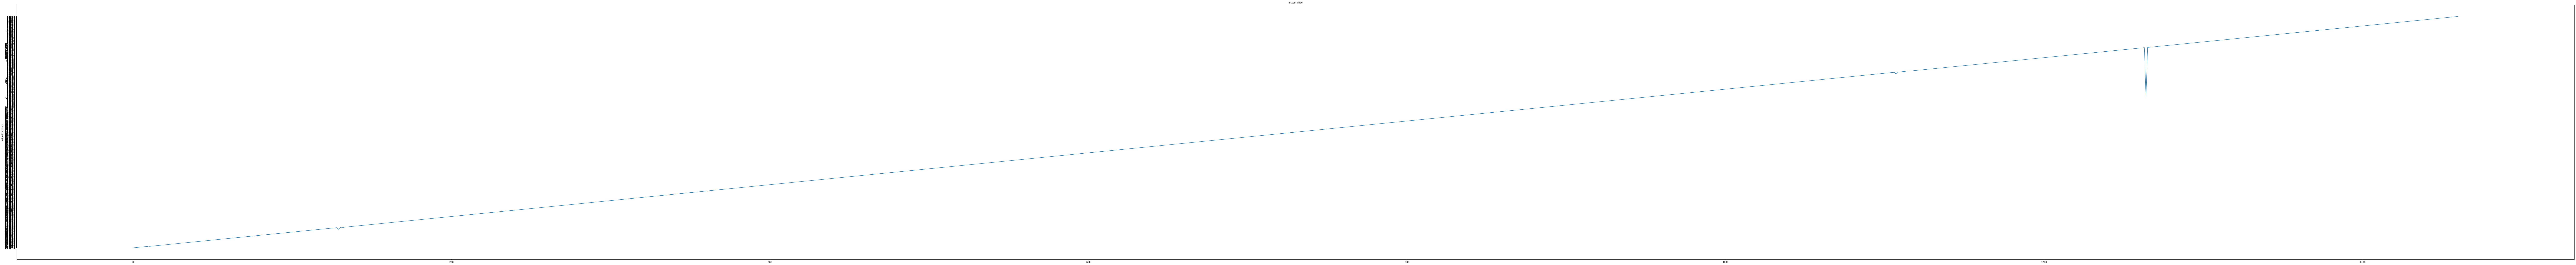

In [ ]:
plt.figure(figsize=(200, 20))
plt.plot(df_bitcoin['Price'])
plt.title('Bitcoin Price', fontsize=10)
plt.ylabel('Price in dollars.')
plt.show()

In [ ]:
df_bitcoin.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

Deleting the commas in Price, Open, High and Low columns

In [ ]:
df_bitcoin['Price'] = df_bitcoin['Price'].str.replace(',', '')
df_bitcoin['Open'] = df_bitcoin['Open'].str.replace(',', '')
df_bitcoin['High'] = df_bitcoin['High'].str.replace(',', '')
df_bitcoin['Low'] = df_bitcoin['Low'].str.replace(',', '')

Casting the values from String to Float in Price, Open, High and Low columns


In [ ]:
df_bitcoin['Price'] = df_bitcoin['Price'].astype(float)
df_bitcoin['Open'] = df_bitcoin['Open'].astype(float)
df_bitcoin['High'] = df_bitcoin['High'].astype(float)
df_bitcoin['Low'] = df_bitcoin['Low'].astype(float)

Distribution plot for Price, Open, High and Low columns

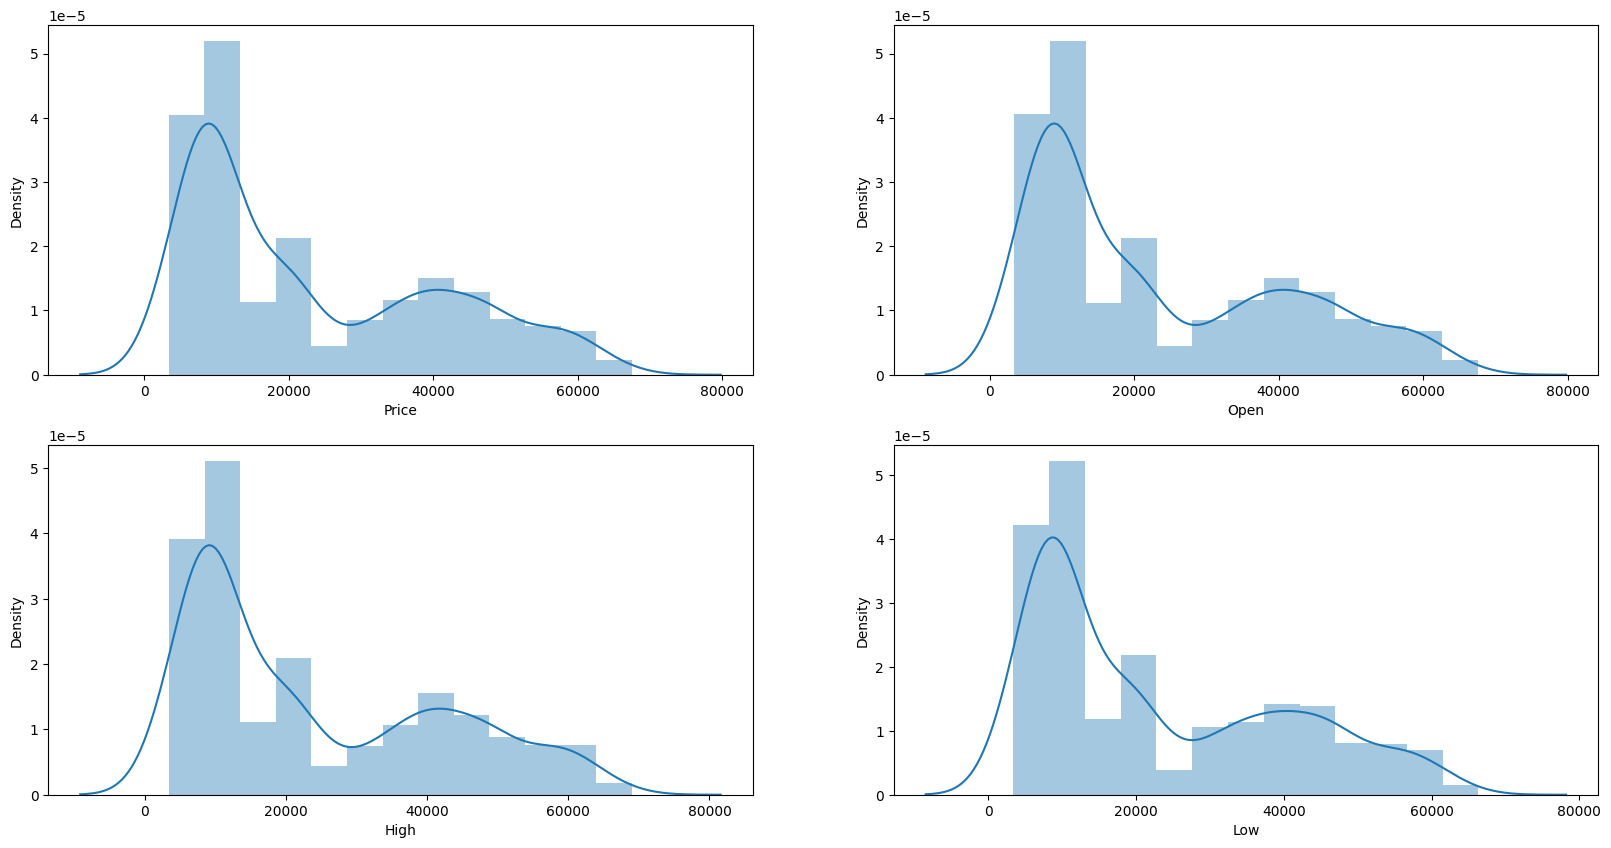

In [ ]:
features = ['Price', 'Open', 'High', 'Low']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df_bitcoin[col])
plt.show()

Splitting day, month and year from the Date column

In [ ]:
splitted = df_bitcoin['Date'].str.split(' ', expand=True)
df_bitcoin['Month'] = splitted[0]

splitted = df_bitcoin['Date'].str.split(',', expand=True)
df_bitcoin['Day'] = splitted[0]
splitted = df_bitcoin['Day'].str.split(' ', expand=True)
df_bitcoin['Day'] = splitted[1].astype('int')

splitted = df_bitcoin['Date'].str.split(',', expand=True)
df_bitcoin['Year'] = splitted[1].astype('int')


df_bitcoin.head()

Date    Price     Open     High      Low     Vol. Change % Month  \
0  Dec 31, 2022  16537.4  16607.2  16635.9  16487.3  130.44K   -0.42%   Dec   
1  Dec 30, 2022  16607.2  16636.4  16644.4  16360.0  192.76K   -0.18%   Dec   
2  Dec 29, 2022  16636.4  16546.2  16659.1  16496.6  181.47K    0.55%   Dec   
3  Dec 28, 2022  16546.2  16705.9  16781.1  16474.2  217.96K   -0.96%   Dec   
4  Dec 27, 2022  16706.1  16918.2  16964.0  16610.1  192.18K   -1.25%   Dec   

   Day  Year  
0   31  2022  
1   30  2022  
2   29  2022  
3   28  2022  
4   27  2022

Barplot of the mean price of the bitcoin year wise



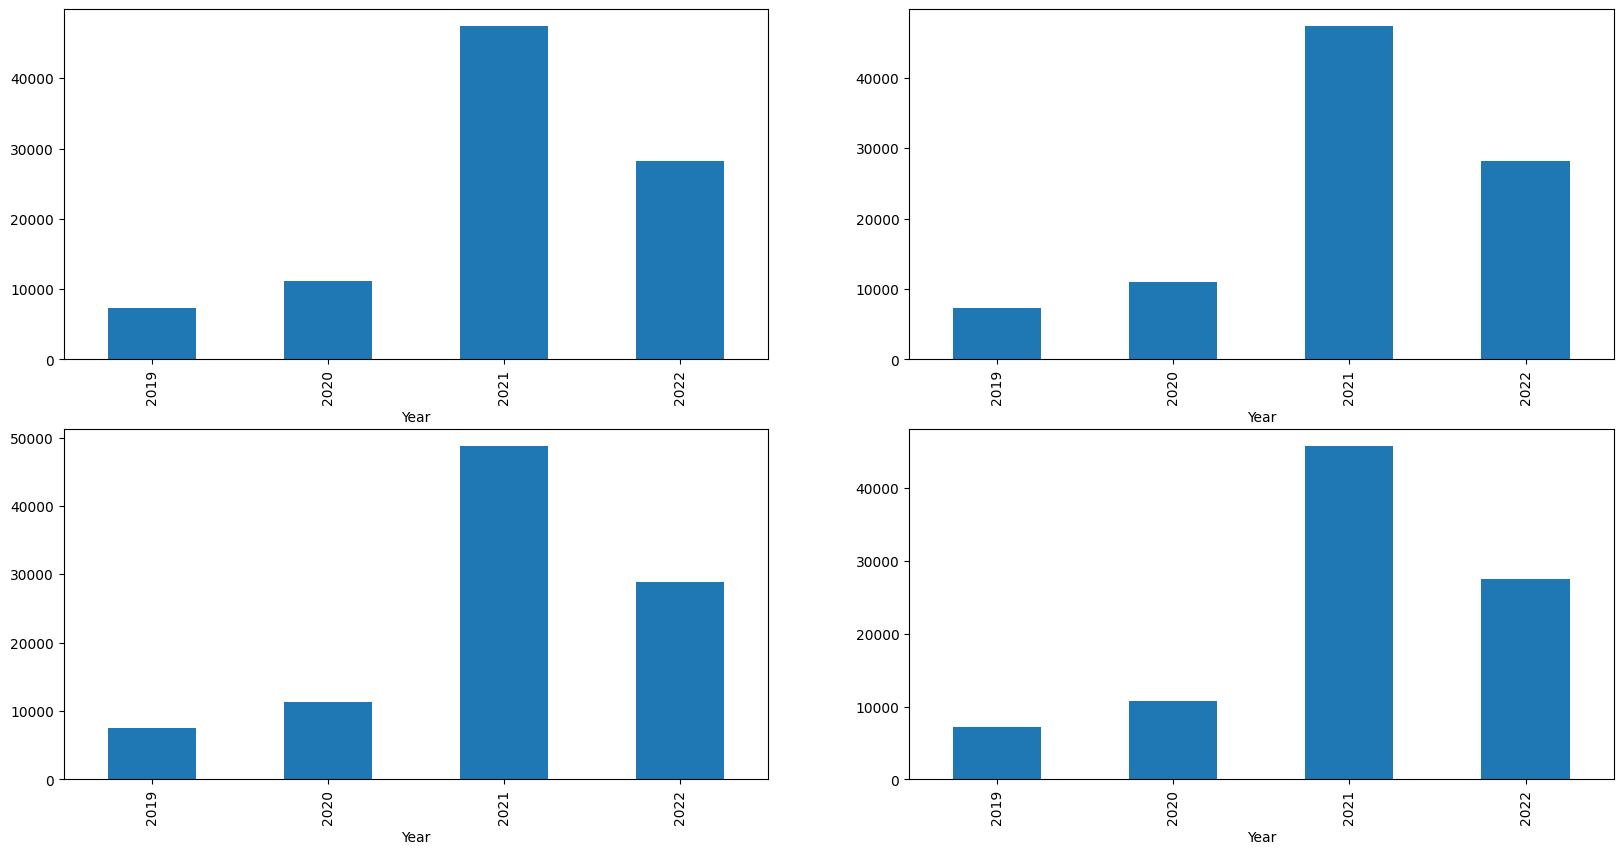

In [ ]:
data_grouped = df_bitcoin.groupby('Year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Price','Open', 'High', 'Low']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

Columns for better training of the model



In [ ]:
df_bitcoin['open-price']  = df_bitcoin['Open'] - df_bitcoin['Price']
df_bitcoin['low-high']  = df_bitcoin['Low'] - df_bitcoin['High']

In [ ]:
df_bitcoin.head()

Date    Price     Open     High      Low     Vol. Change % Month  \
0  Dec 31, 2022  16537.4  16607.2  16635.9  16487.3  130.44K   -0.42%   Dec   
1  Dec 30, 2022  16607.2  16636.4  16644.4  16360.0  192.76K   -0.18%   Dec   
2  Dec 29, 2022  16636.4  16546.2  16659.1  16496.6  181.47K    0.55%   Dec   
3  Dec 28, 2022  16546.2  16705.9  16781.1  16474.2  217.96K   -0.96%   Dec   
4  Dec 27, 2022  16706.1  16918.2  16964.0  16610.1  192.18K   -1.25%   Dec   

   Day  Year  open-price  low-high  
0   31  2022        69.8    -148.6  
1   30  2022        29.2    -284.4  
2   29  2022       -90.2    -162.5  
3   28  2022       159.7    -306.9  
4   27  2022       212.1    -353.9

Heatmap to find the highly correlated features

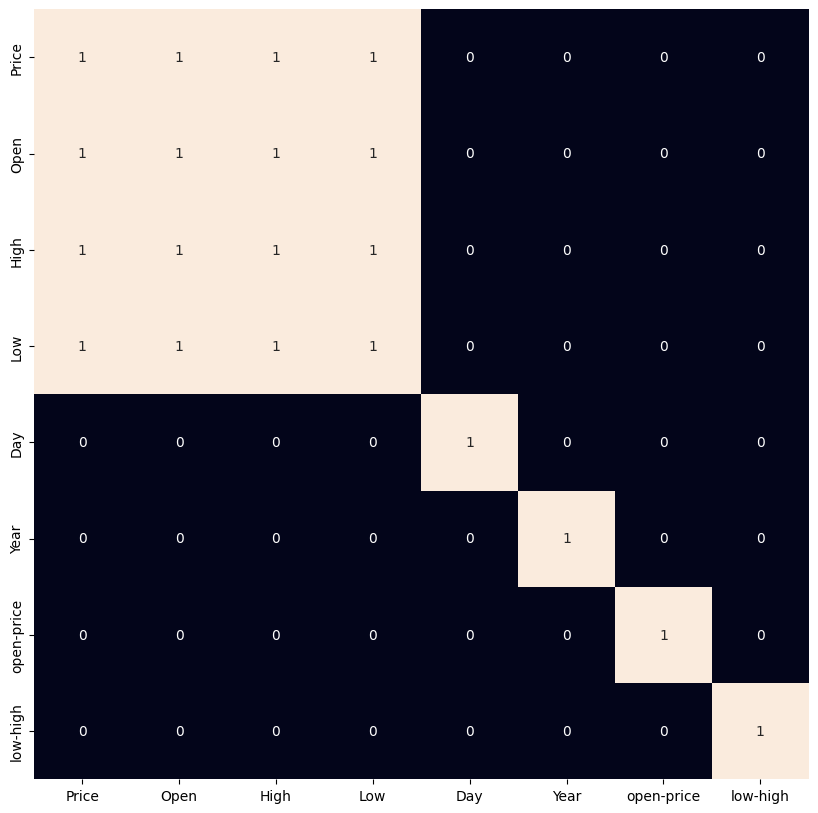

In [ ]:
plt.figure(figsize=(10, 10))

sb.heatmap(df_bitcoin.corr() > 0.9, annot=True, cbar=False)
plt.show()

Linear regression

In [ ]:
required_features = ['Open', 'High', 'Low', 'open-price', 'low-high', 'Day', 'Year']
output_label = 'Price'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_bitcoin[required_features], df_bitcoin[output_label],test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.score(x_test, y_test)

1.0

In [ ]:
future_set = df_bitcoin.shift(periods=30).tail(30)

In [ ]:
prediction = model.predict(future_set[required_features])

Text(0, 0.5, '$ Price')

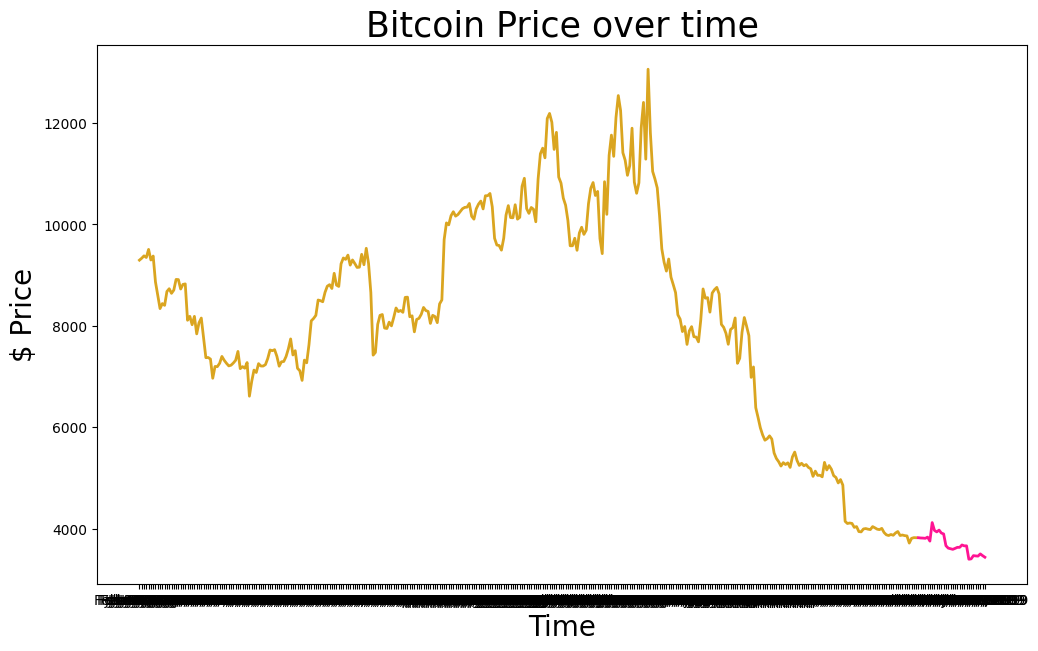

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(df_bitcoin["Date"][-400:-60], df_bitcoin["Open"][-400:-60],  color='goldenrod', lw=2)
plt.plot(future_set["Date"], prediction, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Random Forest

In [ ]:
X=df_bitcoin[required_features]
y=df_bitcoin[output_label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=False)

In [ ]:
train_error=[]
test_error=[]
minDepth=20
maxDepth=40
models=[]
for depth in range(minDepth,maxDepth,5):
    regr=RandomForestRegressor(max_depth=depth, random_state=0,n_estimators=5,verbose=2)
    regr.fit(X_train, y_train)
    models.append(regr)
    tr_error=math.sqrt(mean_squared_error(regr.predict(X_train),y_train))
    te_error=math.sqrt(mean_squared_error(regr.predict(X_test),y_test))
    test_error.append(tr_error)
    train_error.append(te_error)
    print (depth,tr_error,te_error)

building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
20 286.8440989487363 1033.4459215474897
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
25 286.8440989487363 1033.4459215474897
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
30 286.8440989487363 1033.4459215474897
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
35 286.8440989487363 1033.4459215474897


In [ ]:
y_test.head()

1168    8223.4
1169    7957.3
1170    7948.5
1171    8073.3
1172    8000.4
Name: Price, dtype: float64

In [ ]:
print('testing error',mean_squared_error(regr.predict(X_test),y_test))
print('training error',mean_squared_error(regr.predict(X_train),y_train))

testing error 1068010.47276314
training error 82279.53710171241


LSTM


In [ ]:
price = df_bitcoin.Price

X = price
size = int(len(X) * 0.8)
X_train, X_test = X[0:size], X[size:len(X)]
training_values = X_train.values
training_values = np.reshape(training_values, (len(training_values), 1))

scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)

x_train = training_values[0: len(training_values)-1]
y_train = training_values[1: len(training_values)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [ ]:
model = Sequential()
model.add(LSTM(10,input_shape = (None,1), activation="relu", return_sequences=True))
model.add(Dense(1))

In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
37/37 [==============================] - 2s 3ms/step - loss: 0.1919
Epoch 2/50
37/37 [==============================] - 0s 2ms/step - loss: 0.1428
Epoch 3/50
37/37 [==============================] - 0s 2ms/step - loss: 0.1029
Epoch 4/50
37/37 [==============================] - 0s 4ms/step - loss: 0.0728
Epoch 5/50
37/37 [==============================] - 0s 4ms/step - loss: 0.0524
Epoch 6/50
37/37 [==============================] - 0s 4ms/step - loss: 0.0410
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 0.0349
Epoch 8/50
37/37 [==============================] - 0s 4ms/step - loss: 0.0308
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - loss: 0.0270
Epoch 10/50
37/37 [==============================] - 0s 4ms/step - loss: 0.0234
Epoch 11/50
37/37 [==============================] - 0s 5ms/step - loss: 0.0199
Epoch 12/50
37/37 [==============================] - 0s 5ms/step - loss: 0.0166
Epoch 13/50
37/37 [==============================

In [ ]:
test_values = X_test.values
test_values = np.reshape(test_values, (len(test_values), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))
predicted_price = model.predict(test_values)
predicted_price = np.reshape(predicted_price, (len(predicted_price), 1))
predicted_price = scaler.inverse_transform(predicted_price)

10/10 [==============================] - 0s 2ms/step


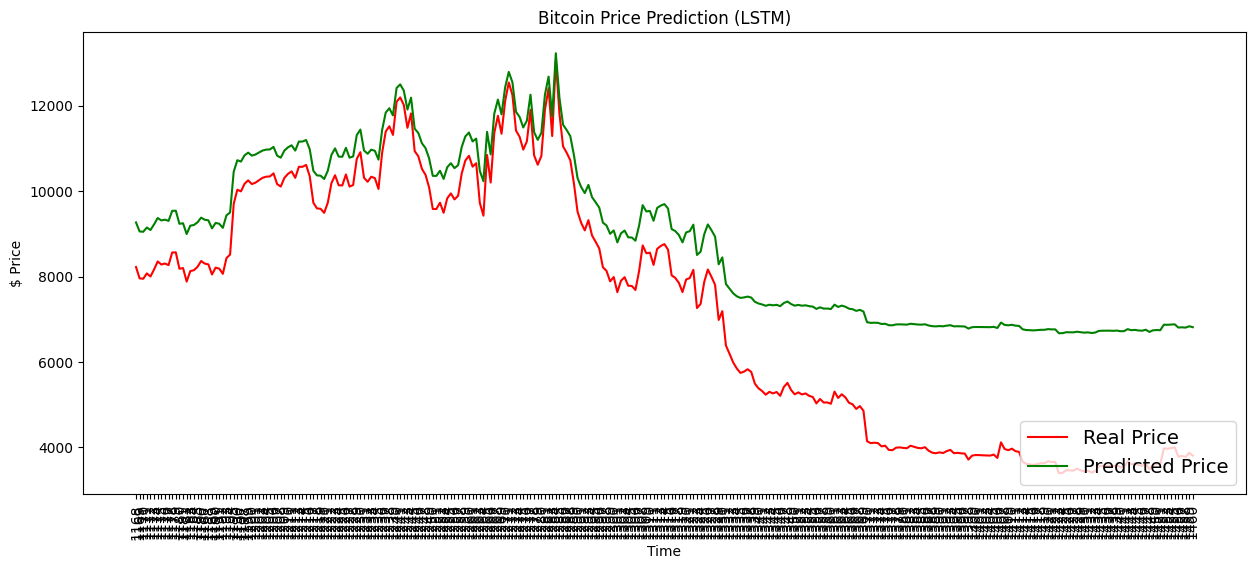

In [ ]:
plt.figure(figsize=(15, 6))
ax = plt.gca()
plt.plot(X_test.values, color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Price')
plt.title('Bitcoin Price Prediction (LSTM)')
X_test = X_test.reset_index()
x= X_test.index
labels = X_test['index']
plt.xticks(x, labels, rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('$ Price')
plt.legend(loc=4, prop={'size': 14})
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(X_test.Price.values, predicted_price))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1943.743


**Price prediction for Litecoin**

In [ ]:
df_litecoin = pd.read_csv('/content/drive/MyDrive/VNP proekt/Litecoin Historical Data.csv')
df_litecoin.head()

Date  Price   Open   High    Low     Vol. Change %
0  Dec 31, 2022  70.08  67.94  71.03  67.62  563.95K    3.15%
1  Dec 30, 2022  67.94  66.66  68.44  66.09  476.53K    1.92%
2  Dec 29, 2022  66.66  66.32  67.24  65.58  498.34K    0.51%
3  Dec 28, 2022  66.32  68.68  69.45  65.73  693.14K   -3.44%
4  Dec 27, 2022  68.68  70.77  71.02  67.81  688.64K   -2.95%

In [ ]:
df_litecoin.shape

(1461, 7)

In [ ]:
df_litecoin.describe()

Price         Open         High          Low
count  1461.000000  1461.000000  1461.000000  1461.000000
mean     97.811413    97.797261   101.681734    93.515947
std      60.888550    60.952894    64.271038    57.180947
min      29.706000    29.707000    31.178000    24.353000
25%      53.258000    53.217000    55.018000    51.585000
50%      72.217000    72.218000    74.400000    68.586000
75%     133.775000   133.778000   137.900000   127.795000
max     386.820000   387.812000   412.802000   345.199000

In [ ]:
df_litecoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1461 non-null   object 
 1   Price     1461 non-null   float64
 2   Open      1461 non-null   float64
 3   High      1461 non-null   float64
 4   Low       1461 non-null   float64
 5   Vol.      1461 non-null   object 
 6   Change %  1461 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.0+ KB


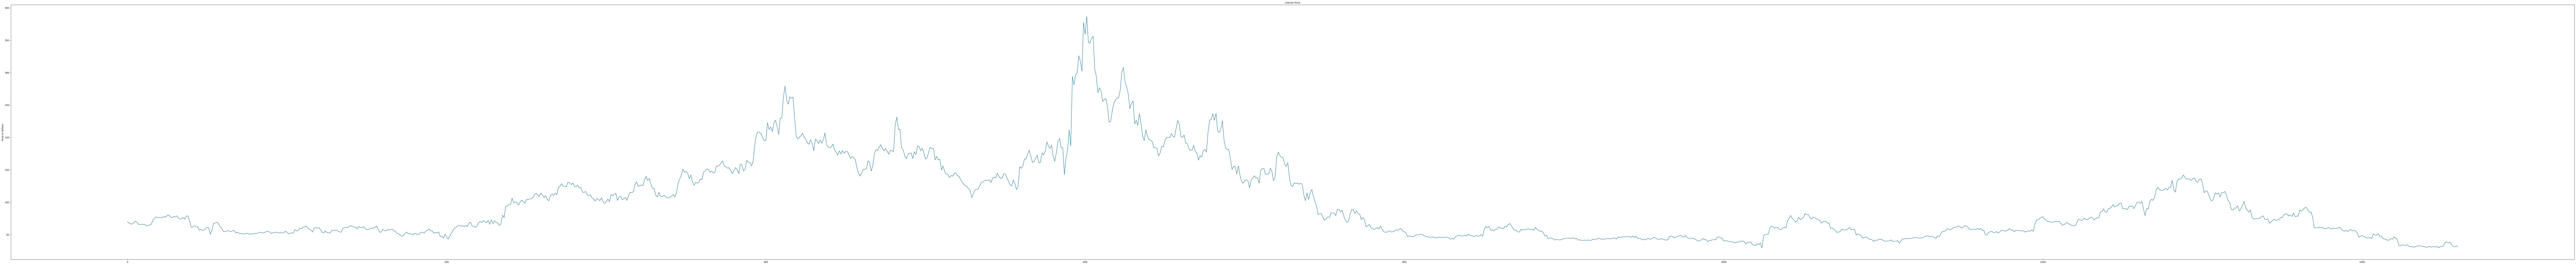

In [ ]:
plt.figure(figsize=(200, 20))
plt.plot(df_litecoin['Price'])
plt.title('Litecoin Price', fontsize=10)
plt.ylabel('Price in dollars.')
plt.show()

In [ ]:
df_litecoin.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [ ]:
df_litecoin['Price'] = df_litecoin['Price'].astype(float)
df_litecoin['Open'] = df_litecoin['Open'].astype(float)
df_litecoin['High'] = df_litecoin['High'].astype(float)
df_litecoin['Low'] = df_litecoin['Low'].astype(float)

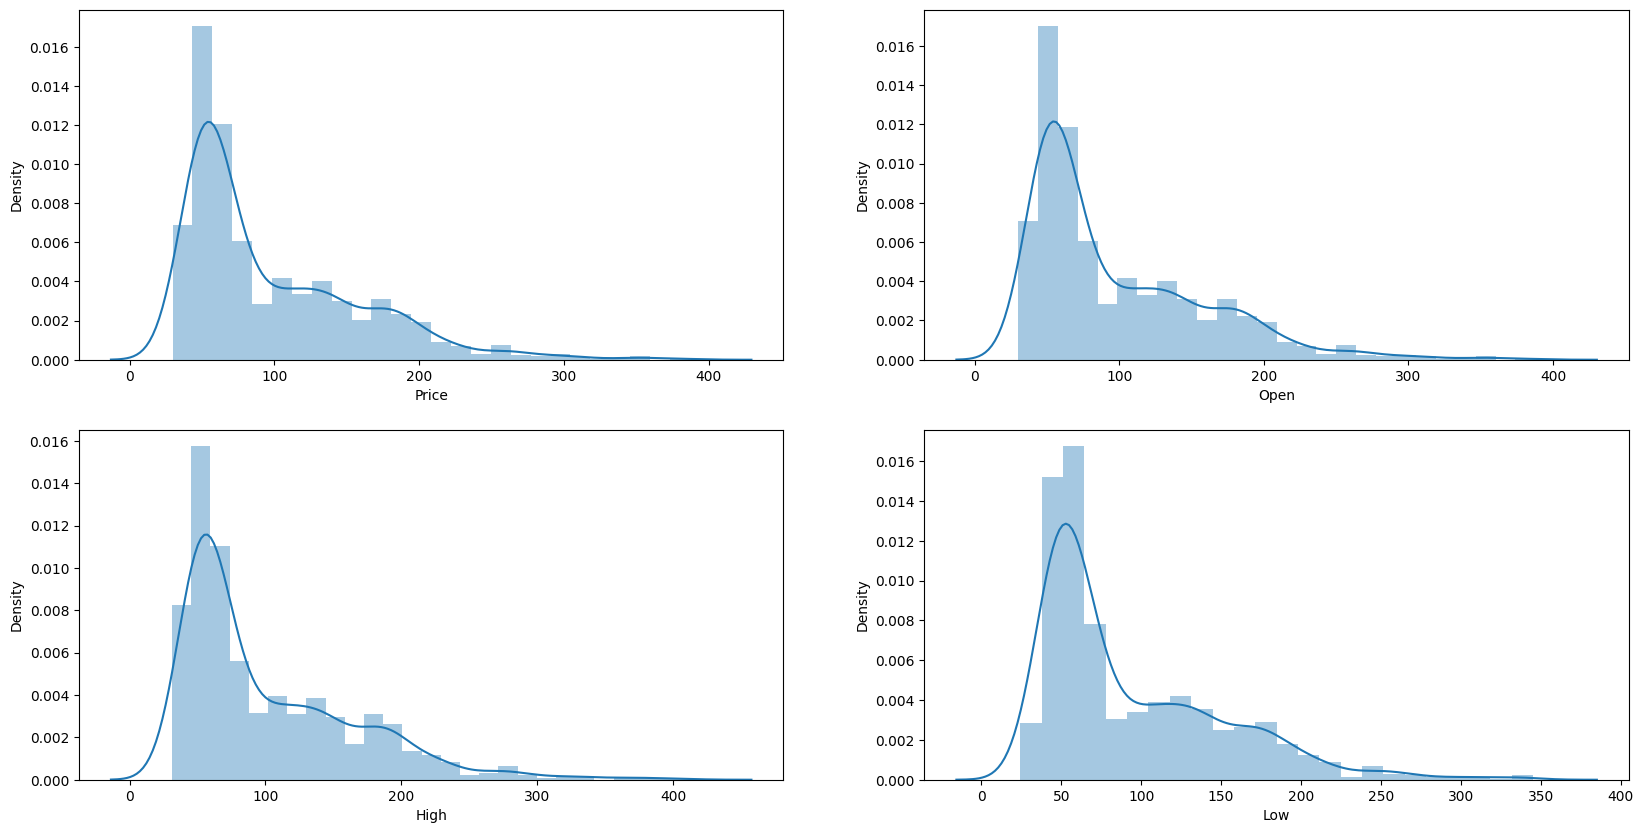

In [ ]:
features = ['Price', 'Open', 'High', 'Low']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df_litecoin[col])
plt.show()

In [ ]:
splitted = df_litecoin['Date'].str.split(' ', expand=True)
df_litecoin['Month'] = splitted[0]

splitted = df_litecoin['Date'].str.split(',', expand=True)
df_litecoin['Day'] = splitted[0]
splitted = df_litecoin['Day'].str.split(' ', expand=True)
df_litecoin['Day'] = splitted[1].astype('int')

splitted = df_litecoin['Date'].str.split(',', expand=True)
df_litecoin['Year'] = splitted[1].astype('int')


df_litecoin.head()

Date  Price   Open   High    Low     Vol. Change % Month  Day  Year
0  Dec 31, 2022  70.08  67.94  71.03  67.62  563.95K    3.15%   Dec   31  2022
1  Dec 30, 2022  67.94  66.66  68.44  66.09  476.53K    1.92%   Dec   30  2022
2  Dec 29, 2022  66.66  66.32  67.24  65.58  498.34K    0.51%   Dec   29  2022
3  Dec 28, 2022  66.32  68.68  69.45  65.73  693.14K   -3.44%   Dec   28  2022
4  Dec 27, 2022  68.68  70.77  71.02  67.81  688.64K   -2.95%   Dec   27  2022

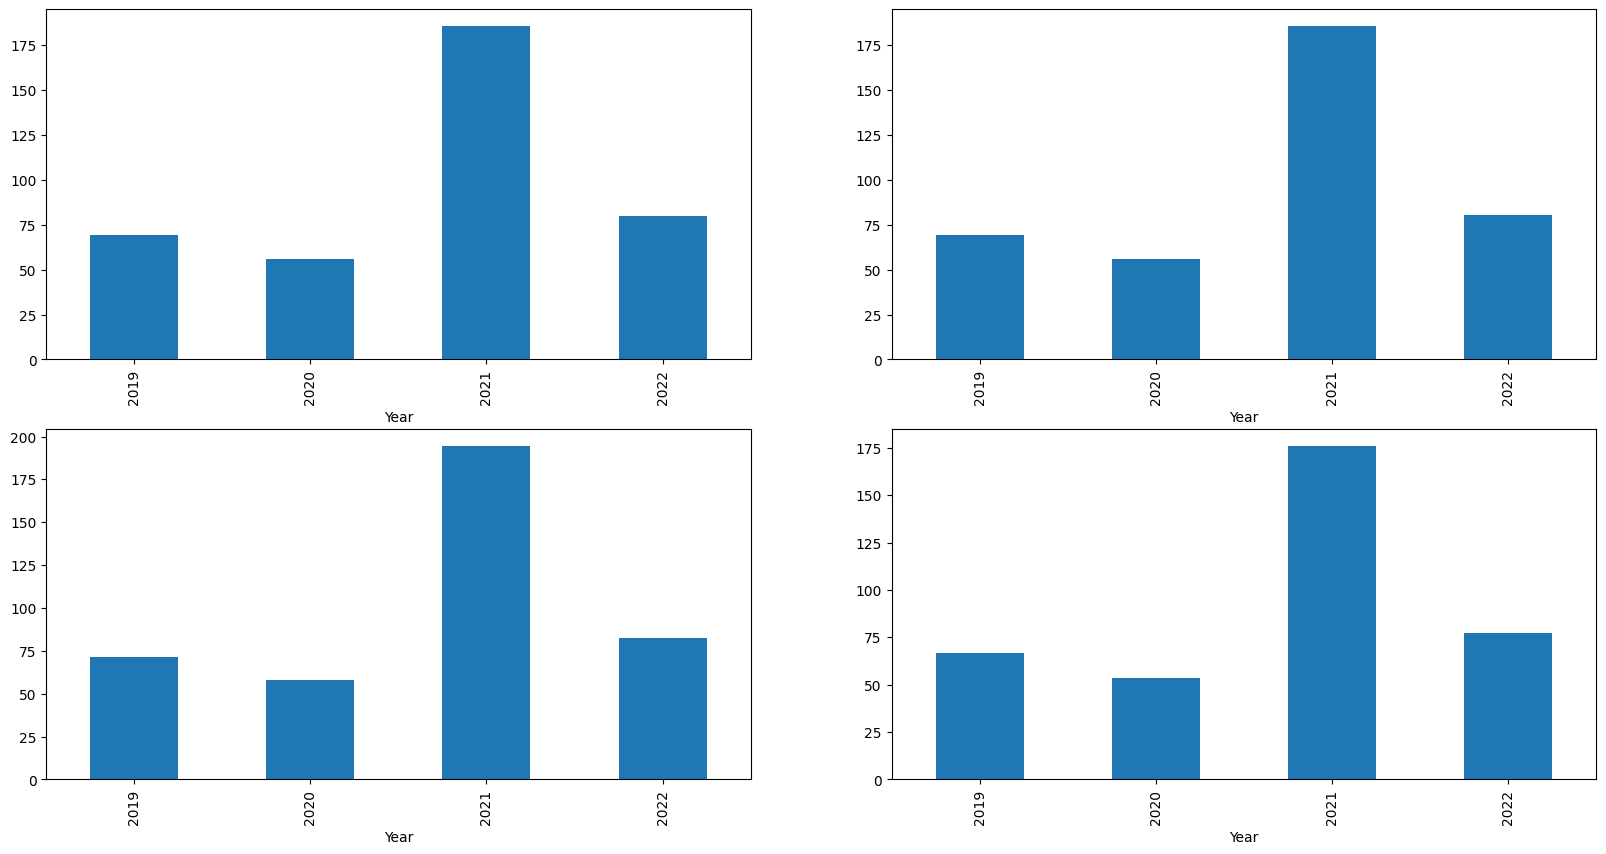

In [ ]:
data_grouped = df_litecoin.groupby('Year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Price','Open', 'High', 'Low']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [ ]:
df_litecoin['open-price']  = df_litecoin['Open'] - df_litecoin['Price']
df_litecoin['low-high']  = df_litecoin['Low'] - df_litecoin['High']

In [ ]:
df_litecoin.head()

Date  Price   Open   High    Low     Vol. Change % Month  Day  \
0  Dec 31, 2022  70.08  67.94  71.03  67.62  563.95K    3.15%   Dec   31   
1  Dec 30, 2022  67.94  66.66  68.44  66.09  476.53K    1.92%   Dec   30   
2  Dec 29, 2022  66.66  66.32  67.24  65.58  498.34K    0.51%   Dec   29   
3  Dec 28, 2022  66.32  68.68  69.45  65.73  693.14K   -3.44%   Dec   28   
4  Dec 27, 2022  68.68  70.77  71.02  67.81  688.64K   -2.95%   Dec   27   

   Year  open-price  low-high  
0  2022       -2.14     -3.41  
1  2022       -1.28     -2.35  
2  2022       -0.34     -1.66  
3  2022        2.36     -3.72  
4  2022        2.09     -3.21

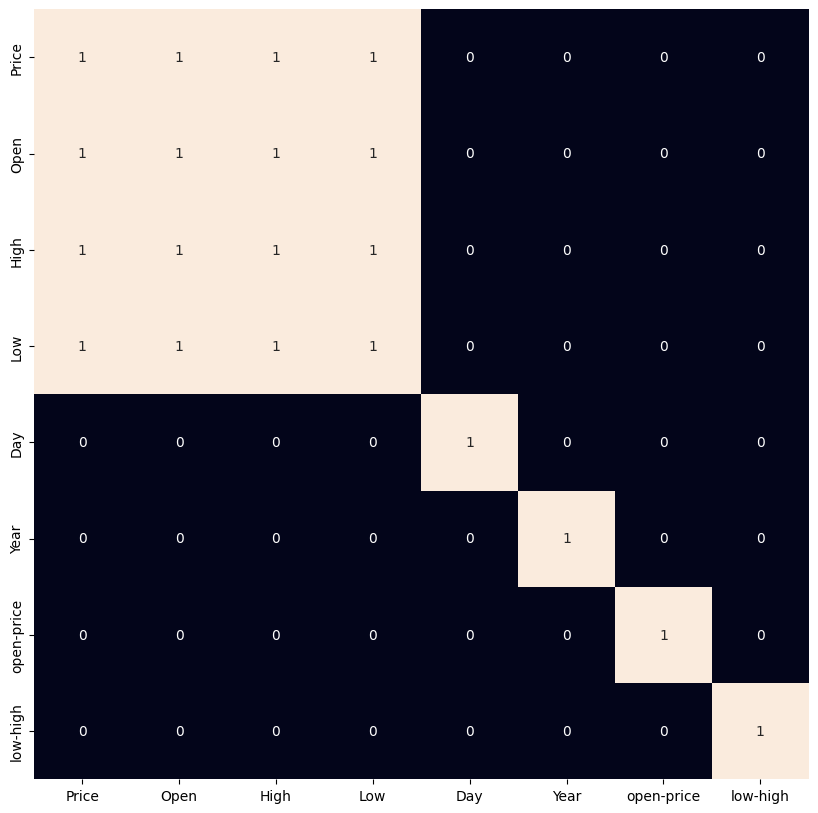

In [ ]:
plt.figure(figsize=(10, 10))

sb.heatmap(df_litecoin.corr() > 0.9, annot=True, cbar=False)
plt.show()

LinearRegression for Litecoin

In [ ]:
required_features = ['Open', 'High', 'Low', 'open-price', 'low-high', 'Day', 'Year']
output_label = 'Price'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_bitcoin[required_features], df_bitcoin[output_label],test_size = 0.2)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.score(x_test, y_test)

1.0

In [ ]:
future_set = df_litecoin.shift(periods=30).tail(30)

In [ ]:
prediction = model.predict(future_set[required_features])

Text(0, 0.5, '$ Price')

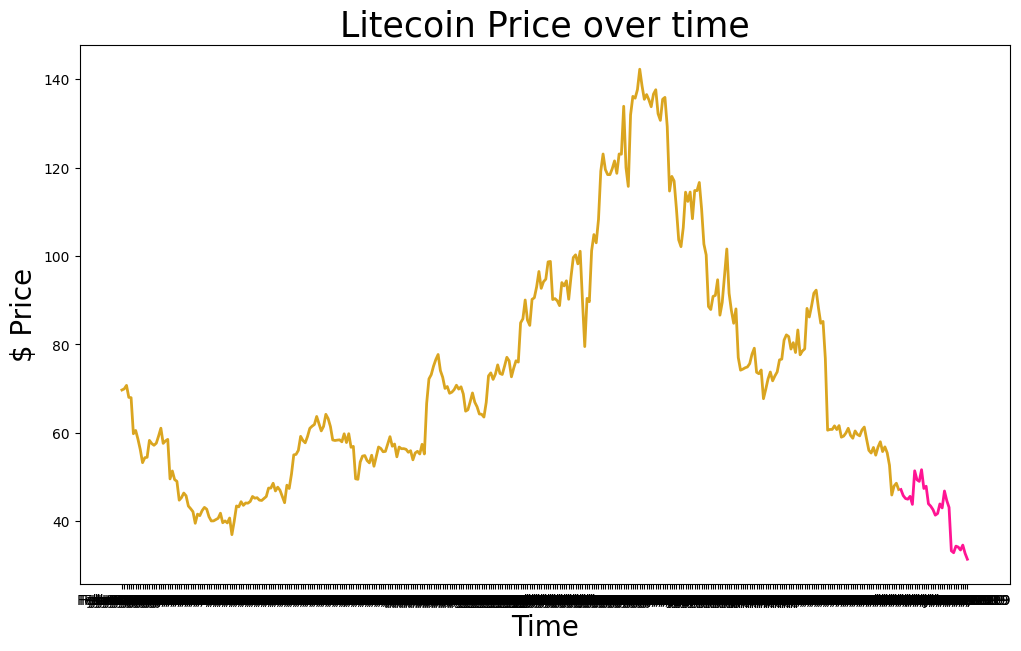

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(df_litecoin["Date"][-400:-60], df_litecoin["Open"][-400:-60],  color='goldenrod', lw=2)
plt.plot(future_set["Date"], prediction, color='deeppink', lw=2)
plt.title("Litecoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

RandomForest for Litecoin

In [ ]:
X=df_litecoin[required_features]
y=df_litecoin[output_label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=False)

In [ ]:
train_error=[]
test_error=[]
minDepth=20
maxDepth=40
models=[]
for depth in range(minDepth,maxDepth,5):
    regr=RandomForestRegressor(max_depth=depth, random_state=0,n_estimators=5,verbose=2)
    regr.fit(X_train, y_train)
    models.append(regr)
    tr_error=math.sqrt(mean_squared_error(regr.predict(X_train),y_train))
    te_error=math.sqrt(mean_squared_error(regr.predict(X_test),y_test))
    test_error.append(tr_error)
    train_error.append(te_error)
    print (depth,tr_error,te_error)

building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
20 1.6365931300171028 2.1818728081291185
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
25 1.6365931300171028 2.1818728081291185
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
30 1.6365931300171028 2.1818728081291185
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
35 1.6365931300171028 2.1818728081291185


In [ ]:
y_test.head()

1168    54.876
1169    53.737
1170    53.217
1171    54.947
1172    52.458
Name: Price, dtype: float64

In [ ]:
print('testing error',mean_squared_error(regr.predict(X_test),y_test))
print('training error',mean_squared_error(regr.predict(X_train),y_train))

testing error 4.760568950853245
training error 2.6784370732191776


LSTM for Litecoin

In [ ]:
price = df_litecoin.Price

X = price
size = int(len(X) * 0.8)
X_train, X_test = X[0:size], X[size:len(X)]
training_values = X_train.values
training_values = np.reshape(training_values, (len(training_values), 1))

scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)

x_train = training_values[0: len(training_values)-1]
y_train = training_values[1: len(training_values)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [ ]:
model = Sequential()
model.add(LSTM(10,input_shape = (None,1), activation="relu", return_sequences=True))
model.add(Dense(1))

In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
37/37 [==============================] - 1s 2ms/step - loss: 0.0735
Epoch 2/50
37/37 [==============================] - 0s 1ms/step - loss: 0.0540
Epoch 3/50
37/37 [==============================] - 0s 1ms/step - loss: 0.0419
Epoch 4/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0341
Epoch 5/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 6/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 7/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 8/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 9/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 10/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 11/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 12/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 13/50
37/37 [==============================

In [ ]:
test_values = X_test.values
test_values = np.reshape(test_values, (len(test_values), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))
predicted_price = model.predict(test_values)
predicted_price = np.reshape(predicted_price, (len(predicted_price), 1))
predicted_price = scaler.inverse_transform(predicted_price)

10/10 [==============================] - 0s 1ms/step


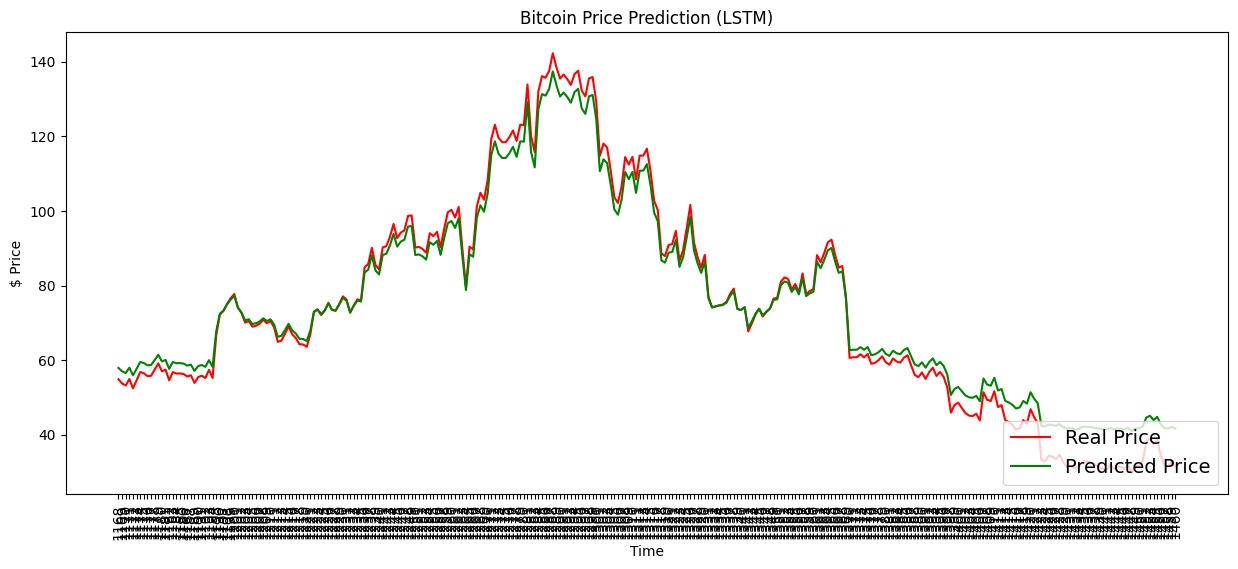

In [ ]:
plt.figure(figsize=(15, 6))
ax = plt.gca()
plt.plot(X_test.values, color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Price')
plt.title('Bitcoin Price Prediction (LSTM)')
X_test = X_test.reset_index()
x= X_test.index
labels = X_test['index']
plt.xticks(x, labels, rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('$ Price')
plt.legend(loc=4, prop={'size': 14})
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(X_test.Price.values, predicted_price))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 4.365


Peice prediction for Dogecoin

In [ ]:
df_dogecoin = pd.read_csv('/content/drive/MyDrive/VNP proekt/Dogecoin Historical Data.csv')
df_dogecoin.head()

Date     Price      Open      High       Low   Vol. Change %
0  Dec 31, 2022  0.070144  0.068392  0.071239  0.067988  1.18B    2.56%
1  Dec 30, 2022  0.068395  0.070933  0.071405  0.066392  1.86B   -3.60%
2  Dec 29, 2022  0.070952  0.070376  0.071441  0.069455  1.16B    0.81%
3  Dec 28, 2022  0.070382  0.073704  0.073848  0.069610  2.31B   -4.51%
4  Dec 27, 2022  0.073704  0.075672  0.076088  0.072824  1.04B   -2.61%

In [ ]:
df_dogecoin.shape

(1461, 7)

In [ ]:
df_dogecoin.describe()

Price         Open         High          Low
count  1461.000000  1461.000000  1461.000000  1461.000000
mean      0.076808     0.076765     0.081390     0.072081
std       0.105709     0.105732     0.113537     0.097267
min       0.001585     0.001580     0.001720     0.001291
25%       0.002602     0.002600     0.002666     0.002547
50%       0.005661     0.004777     0.008454     0.004522
75%       0.127659     0.127659     0.134819     0.121422
max       0.686880     0.686914     0.738255     0.605162

In [ ]:
df_dogecoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1461 non-null   object 
 1   Price     1461 non-null   float64
 2   Open      1461 non-null   float64
 3   High      1461 non-null   float64
 4   Low       1461 non-null   float64
 5   Vol.      1461 non-null   object 
 6   Change %  1461 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.0+ KB


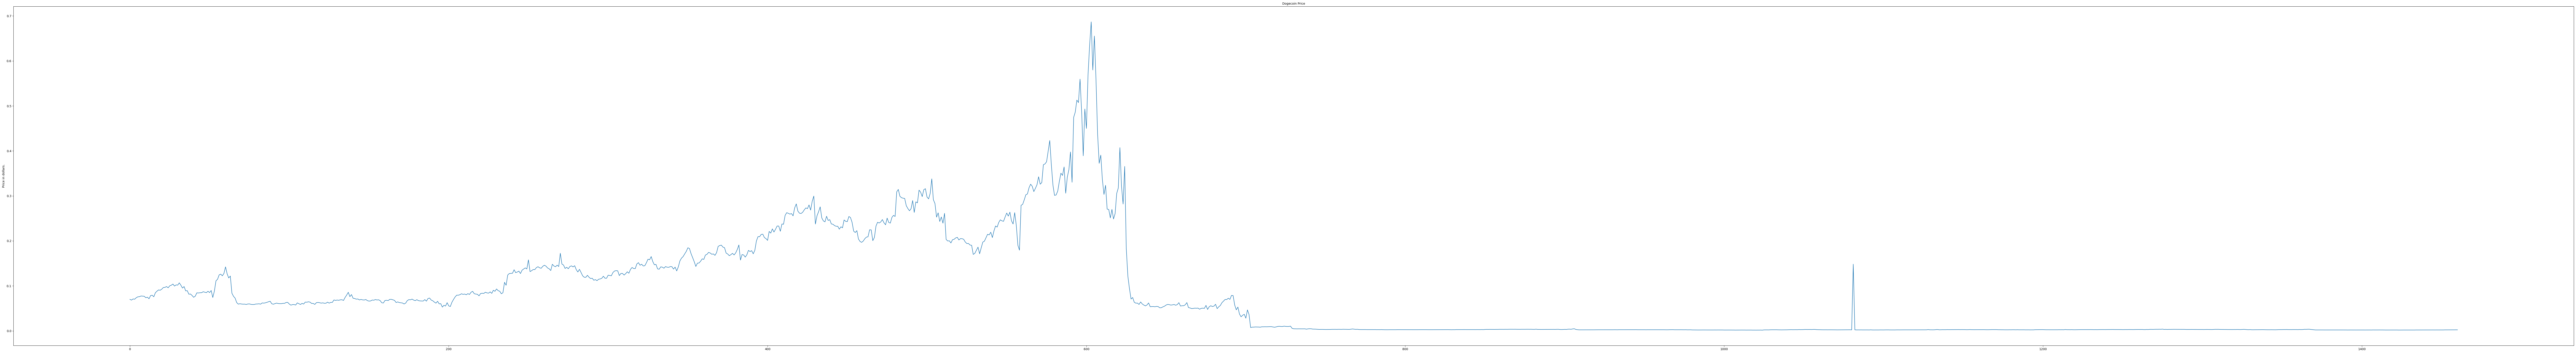

In [ ]:
plt.figure(figsize=(150, 20))
plt.plot(df_dogecoin['Price'])
plt.title('Dogecoin Price', fontsize=10)
plt.ylabel('Price in dollars.')
plt.show()

In [ ]:
df_dogecoin.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [ ]:
df_dogecoin['Price'] = df_dogecoin['Price'].astype(float)
df_dogecoin['Open'] = df_dogecoin['Open'].astype(float)
df_dogecoin['High'] = df_dogecoin['High'].astype(float)
df_dogecoin['Low'] = df_dogecoin['Low'].astype(float)

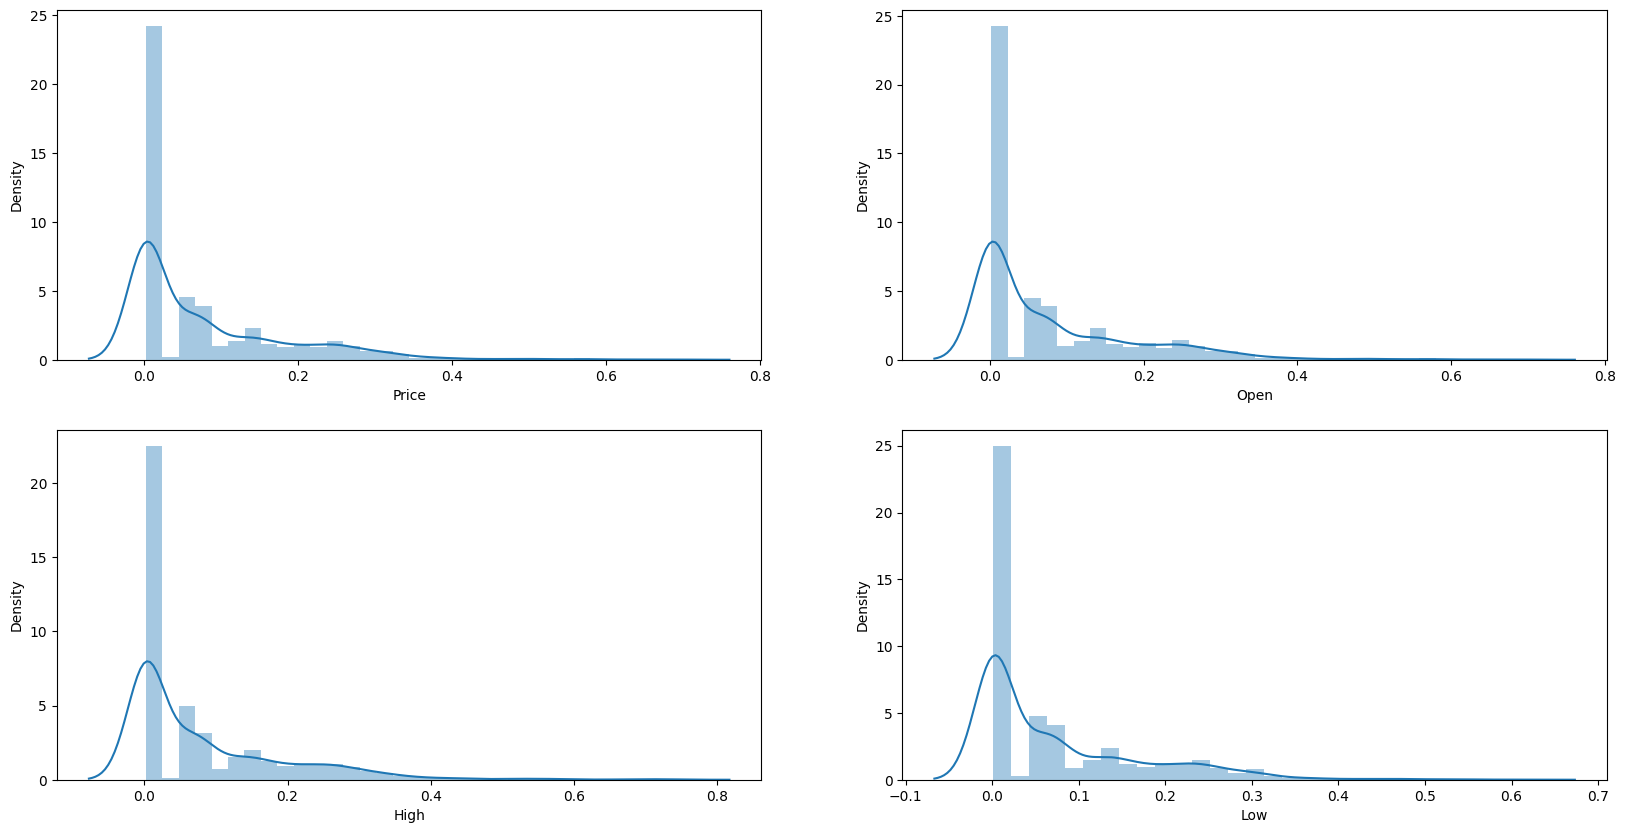

In [ ]:
features = ['Price', 'Open', 'High', 'Low']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df_dogecoin[col])
plt.show()

In [ ]:
splitted = df_dogecoin['Date'].str.split(' ', expand=True)
df_dogecoin['Month'] = splitted[0]

splitted = df_dogecoin['Date'].str.split(',', expand=True)
df_dogecoin['Day'] = splitted[0]
splitted = df_dogecoin['Day'].str.split(' ', expand=True)
df_dogecoin['Day'] = splitted[1].astype('int')

splitted = df_dogecoin['Date'].str.split(',', expand=True)
df_dogecoin['Year'] = splitted[1].astype('int')


df_dogecoin.head()

Date     Price      Open      High       Low   Vol. Change % Month  \
0  Dec 31, 2022  0.070144  0.068392  0.071239  0.067988  1.18B    2.56%   Dec   
1  Dec 30, 2022  0.068395  0.070933  0.071405  0.066392  1.86B   -3.60%   Dec   
2  Dec 29, 2022  0.070952  0.070376  0.071441  0.069455  1.16B    0.81%   Dec   
3  Dec 28, 2022  0.070382  0.073704  0.073848  0.069610  2.31B   -4.51%   Dec   
4  Dec 27, 2022  0.073704  0.075672  0.076088  0.072824  1.04B   -2.61%   Dec   

   Day  Year  
0   31  2022  
1   30  2022  
2   29  2022  
3   28  2022  
4   27  2022

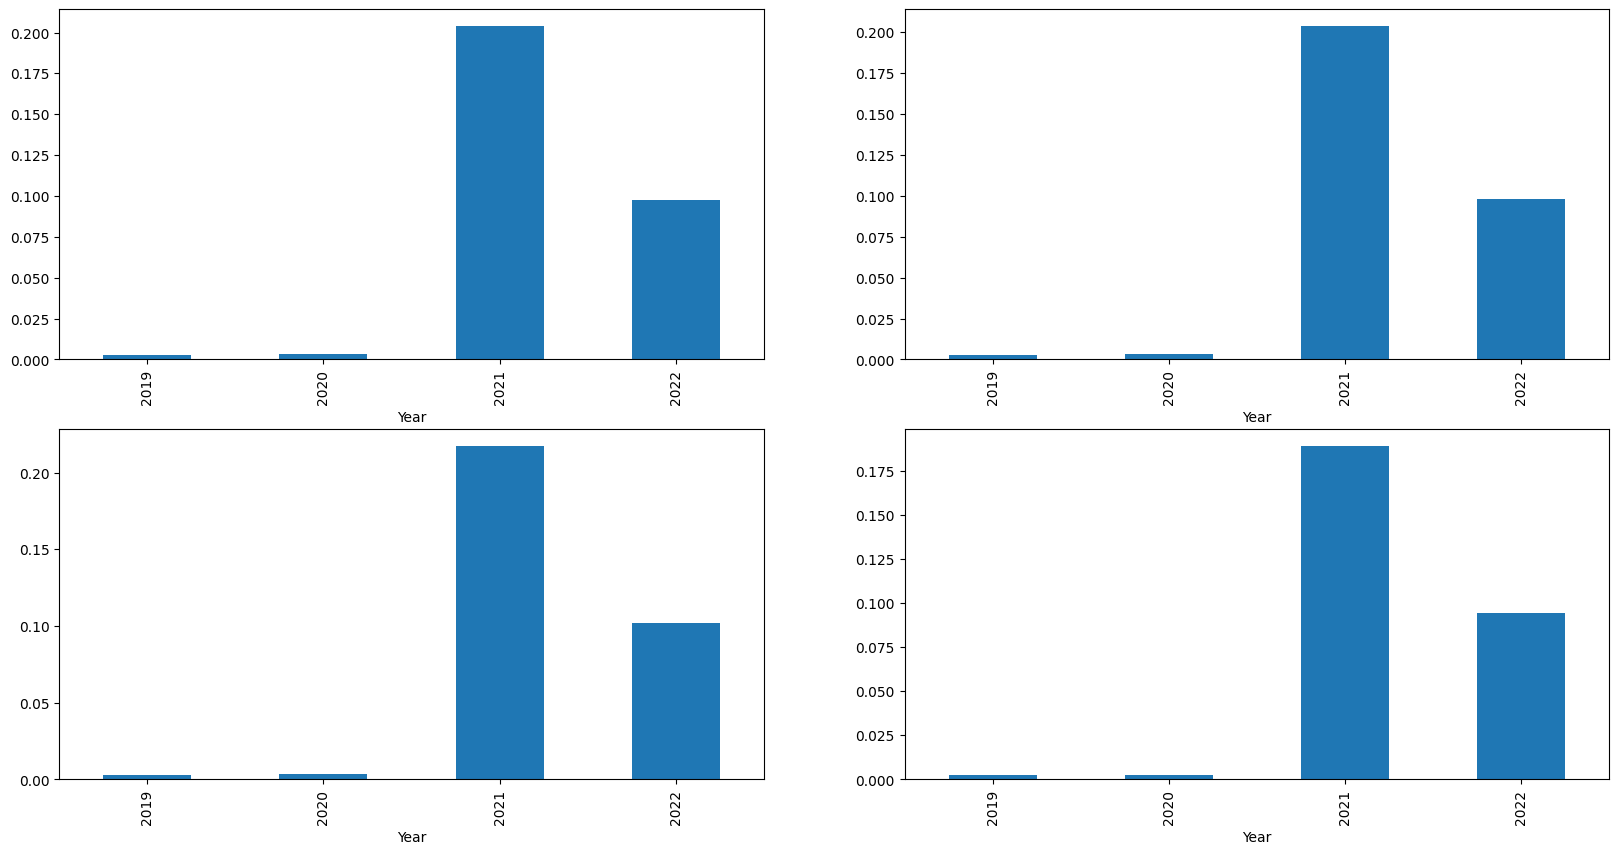

In [ ]:
data_grouped = df_dogecoin.groupby('Year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Price','Open', 'High', 'Low']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [ ]:
df_dogecoin['open-price']  = df_dogecoin['Open'] - df_dogecoin['Price']
df_dogecoin['low-high']  = df_dogecoin['Low'] - df_dogecoin['High']

In [ ]:
df_dogecoin.head()

Date     Price      Open      High       Low   Vol. Change % Month  \
0  Dec 31, 2022  0.070144  0.068392  0.071239  0.067988  1.18B    2.56%   Dec   
1  Dec 30, 2022  0.068395  0.070933  0.071405  0.066392  1.86B   -3.60%   Dec   
2  Dec 29, 2022  0.070952  0.070376  0.071441  0.069455  1.16B    0.81%   Dec   
3  Dec 28, 2022  0.070382  0.073704  0.073848  0.069610  2.31B   -4.51%   Dec   
4  Dec 27, 2022  0.073704  0.075672  0.076088  0.072824  1.04B   -2.61%   Dec   

   Day  Year  open-price  low-high  
0   31  2022   -0.001752 -0.003251  
1   30  2022    0.002538 -0.005013  
2   29  2022   -0.000576 -0.001986  
3   28  2022    0.003322 -0.004238  
4   27  2022    0.001968 -0.003264

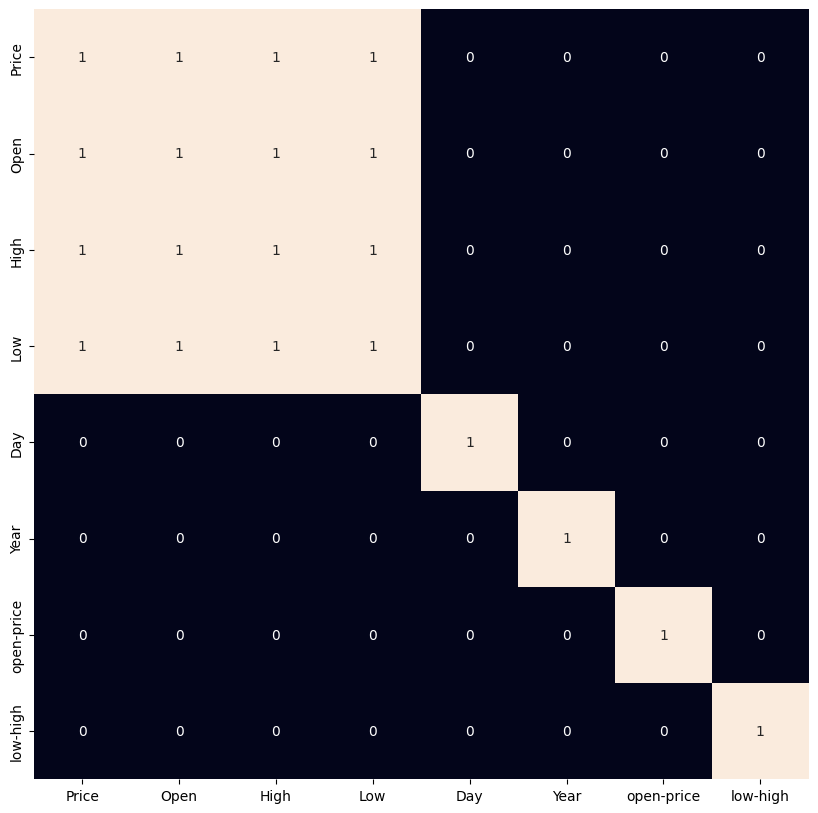

In [ ]:
plt.figure(figsize=(10, 10))

sb.heatmap(df_dogecoin.corr() > 0.9, annot=True, cbar=False)
plt.show()

Linear Regression for Dogecoin

In [ ]:
required_features = ['Open', 'High', 'Low', 'open-price', 'low-high', 'Day', 'Year']
output_label = 'Price'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_dogecoin[required_features], df_dogecoin[output_label],test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.score(x_test, y_test)

1.0

In [ ]:
future_set = df_dogecoin.shift(periods=30).tail(30)

In [ ]:
prediction = model.predict(future_set[required_features])

Text(0, 0.5, '$ Price')

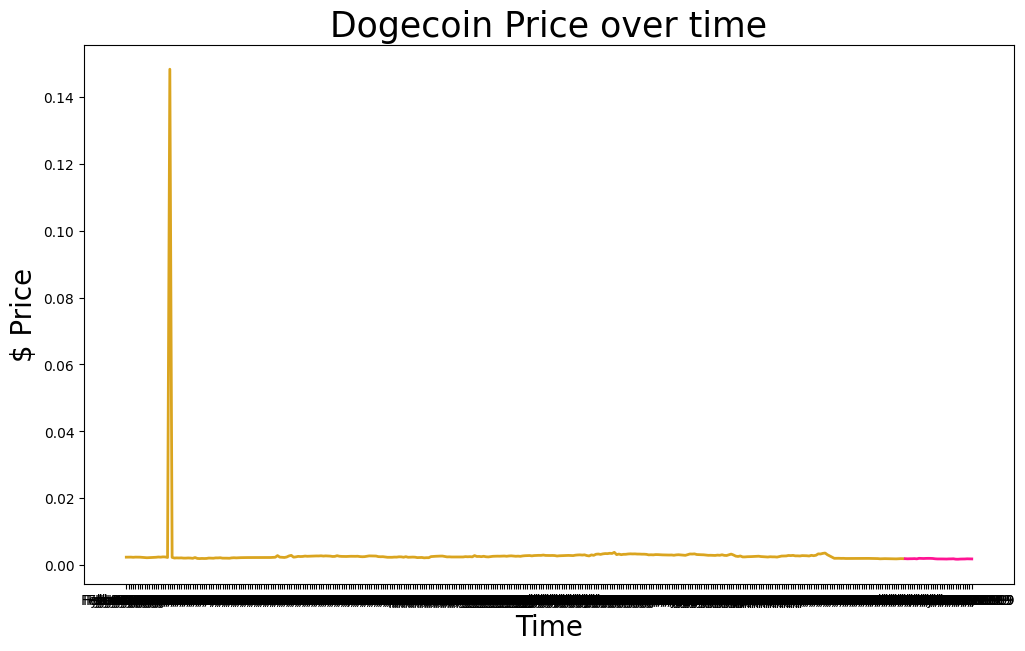

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(df_dogecoin["Date"][-400:-60], df_dogecoin["Open"][-400:-60],  color='goldenrod', lw=2)
plt.plot(future_set["Date"], prediction, color='deeppink', lw=2)
plt.title("Dogecoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Random Forest for Dogecoin

In [ ]:
X=df_dogecoin[required_features]
y=df_dogecoin[output_label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=False)


In [ ]:
train_error=[]
test_error=[]
minDepth=20
maxDepth=40
models=[]
for depth in range(minDepth,maxDepth,5):
    regr=RandomForestRegressor(max_depth=depth, random_state=0,n_estimators=5,verbose=2)
    regr.fit(X_train, y_train)
    models.append(regr)
    tr_error=math.sqrt(mean_squared_error(regr.predict(X_train),y_train))
    te_error=math.sqrt(mean_squared_error(regr.predict(X_test),y_test))
    test_error.append(tr_error)
    train_error.append(te_error)
    print (depth,tr_error,te_error)

building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
20 0.003924960629009182 6.24076644894737e-05
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
25 0.003892841327056241 6.575528839734818e-05
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
30 0.003892841327056241 6.575528839734818e-05
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
35 0.003892841327056241 6.575528839734818e-05


In [ ]:
y_test.head()

1168    0.002800
1169    0.002788
1170    0.002753
1171    0.002755
1172    0.002583
Name: Price, dtype: float64

In [ ]:
print('testing error',mean_squared_error(regr.predict(X_test),y_test))
print('training error',mean_squared_error(regr.predict(X_train),y_train))

testing error 4.323757952218432e-09
training error 1.5154213597636997e-05


LSTM for Dogecoin

In [ ]:
price = df_dogecoin.Price

X = price
size = int(len(X) * 0.8)
X_train, X_test = X[0:size], X[size:len(X)]
training_values = X_train.values
training_values = np.reshape(training_values, (len(training_values), 1))

scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)

x_train = training_values[0: len(training_values)-1]
y_train = training_values[1: len(training_values)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [ ]:
model = Sequential()
model.add(LSTM(10,input_shape = (None,1), activation="relu", return_sequences=True))
model.add(Dense(1))

In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
37/37 [==============================] - 2s 2ms/step - loss: 0.0437
Epoch 2/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0339
Epoch 3/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0287
Epoch 4/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0260
Epoch 5/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 0.0236
Epoch 7/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 8/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 9/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 10/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 11/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 12/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 13/50
37/37 [==============================

In [ ]:
test_values = X_test.values
test_values = np.reshape(test_values, (len(test_values), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))
predicted_price = model.predict(test_values)
predicted_price = np.reshape(predicted_price, (len(predicted_price), 1))
predicted_price = scaler.inverse_transform(predicted_price)

10/10 [==============================] - 0s 2ms/step


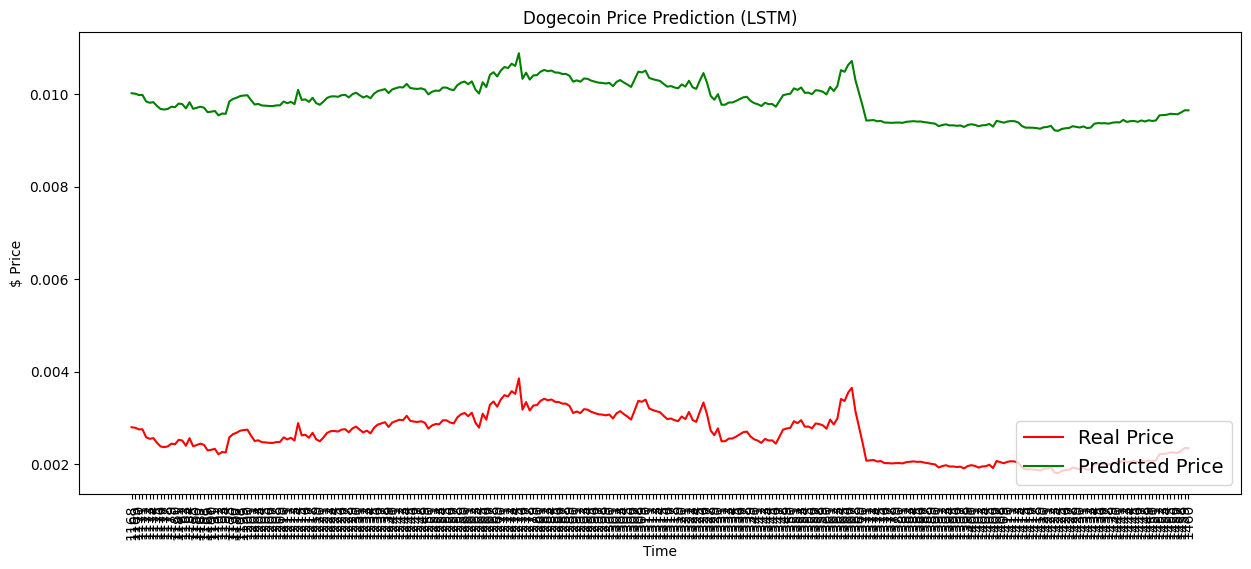

In [ ]:
plt.figure(figsize=(15, 6))
ax = plt.gca()
plt.plot(X_test.values, color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Price')
plt.title('Dogecoin Price Prediction (LSTM)')
X_test = X_test.reset_index()
x= X_test.index
labels = X_test['index']
plt.xticks(x, labels, rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('$ Price')
plt.legend(loc=4, prop={'size': 14})
plt.show()

**Price prediction for Etherium**

In [ ]:
df_etherium = pd.read_csv('/content/drive/MyDrive/VNP proekt/Ethereum Historical Data.csv')
df_etherium.head()

Date     Price      Open      High       Low     Vol. Change %
0  Dec 31, 2022  1,195.67  1,200.00  1,207.71  1,193.16  150.20K   -0.34%
1  Dec 30, 2022  1,199.80  1,200.84  1,202.13  1,186.10  285.77K   -0.09%
2  Dec 29, 2022  1,200.84  1,189.99  1,205.34  1,187.19  272.59K    0.91%
3  Dec 28, 2022  1,189.98  1,211.60  1,214.32  1,184.22  407.45K   -1.78%
4  Dec 27, 2022  1,211.60  1,228.22  1,233.15  1,202.02  290.02K   -1.31%

In [ ]:
df_etherium.shape

(1461, 7)

In [ ]:
df_etherium.describe()

Date   Price    Open    High     Low   Vol. Change %
count           1461    1461    1461    1461    1461   1461     1461
unique          1461    1441    1442    1450    1450   1152      930
top     Dec 31, 2022  137.92  145.79  175.78  137.61  1.94M   -2.11%
freq               1       2       3       2       2      7        7

In [ ]:
df_etherium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1461 non-null   object
 1   Price     1461 non-null   object
 2   Open      1461 non-null   object
 3   High      1461 non-null   object
 4   Low       1461 non-null   object
 5   Vol.      1461 non-null   object
 6   Change %  1461 non-null   object
dtypes: object(7)
memory usage: 80.0+ KB


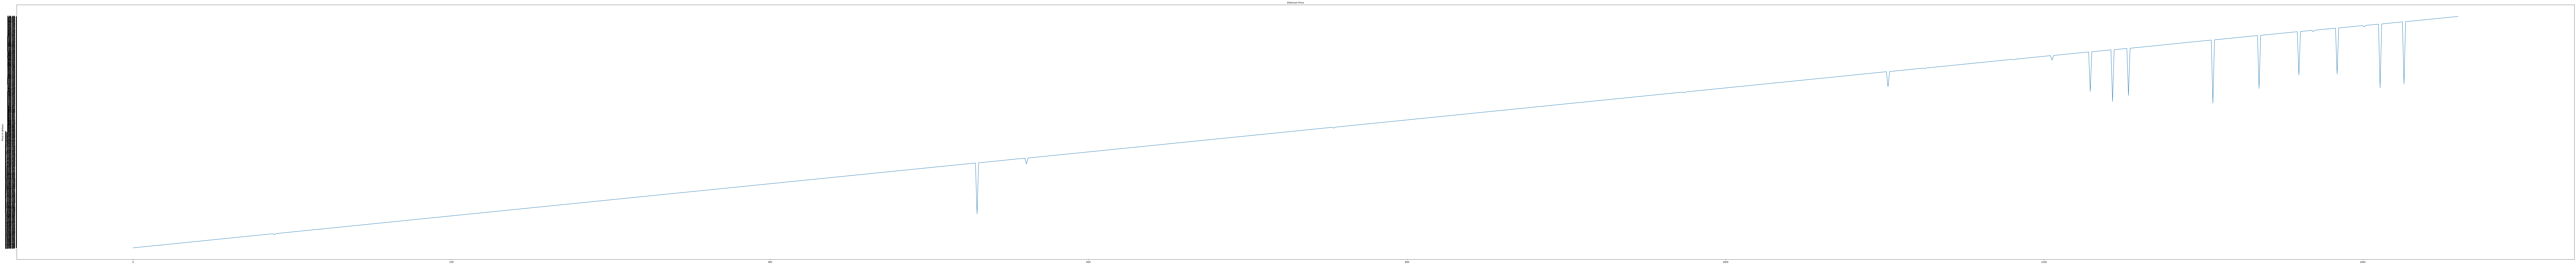

In [ ]:
plt.figure(figsize=(200, 20))
plt.plot(df_etherium['Price'])
plt.title('Etherium Price', fontsize=10)
plt.ylabel('Price in dollars.')
plt.show()

In [ ]:
df_etherium.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [ ]:
df_etherium['Price'] = df_etherium['Price'].str.replace(',', '')
df_etherium['Open'] = df_etherium['Open'].str.replace(',', '')
df_etherium['High'] = df_etherium['High'].str.replace(',', '')
df_etherium['Low'] = df_etherium['Low'].str.replace(',', '')

In [ ]:
df_etherium['Price'] = df_etherium['Price'].astype(float)
df_etherium['Open'] = df_etherium['Open'].astype(float)
df_etherium['High'] = df_etherium['High'].astype(float)
df_etherium['Low'] = df_etherium['Low'].astype(float)

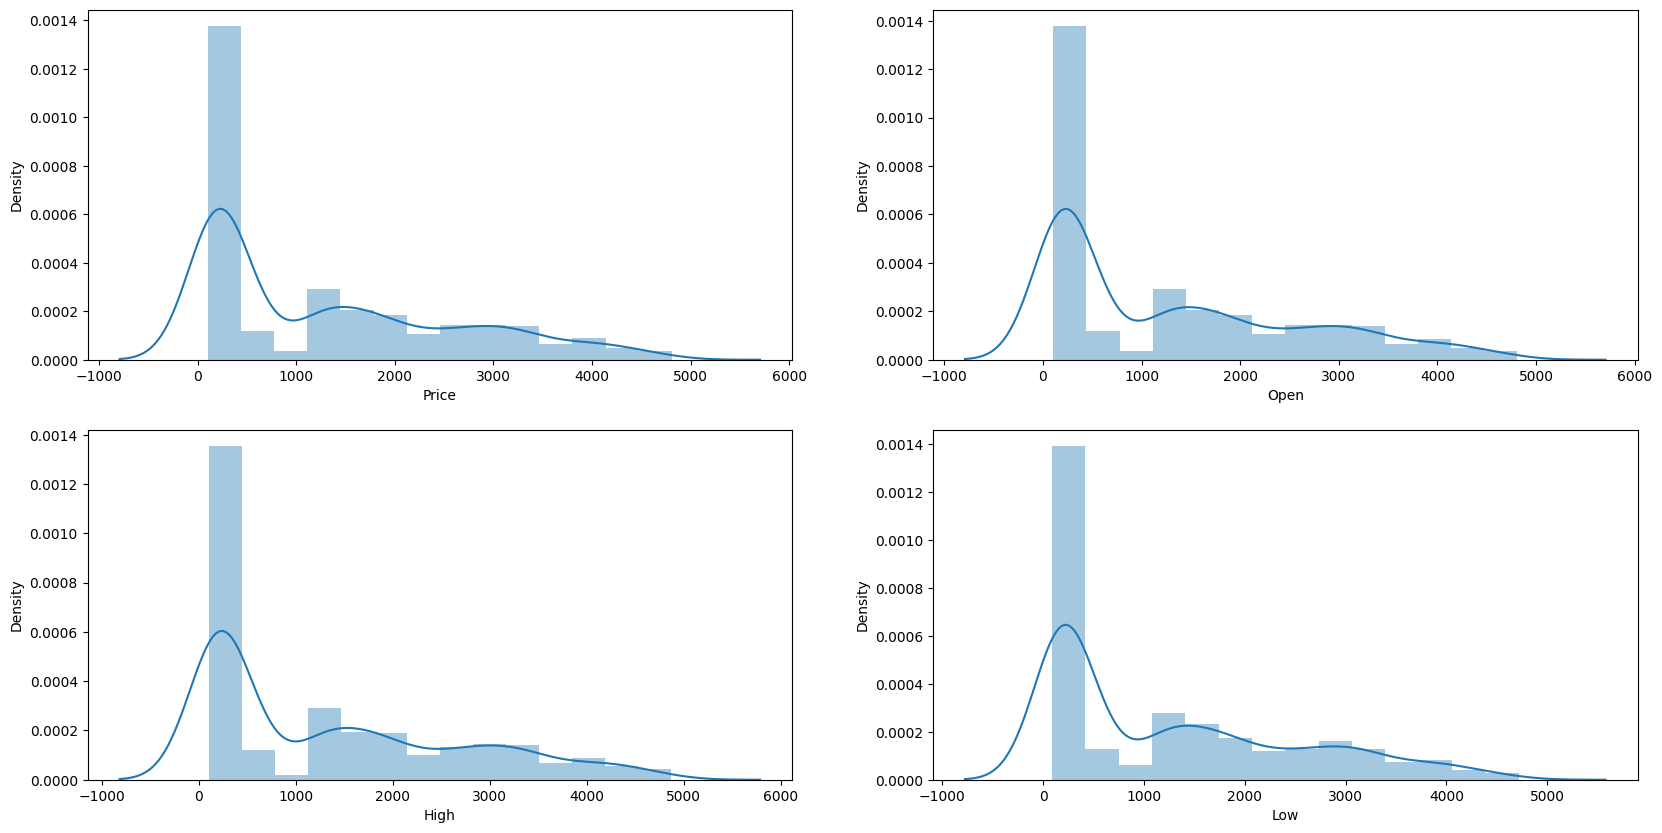

In [ ]:
features = ['Price', 'Open', 'High', 'Low']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df_etherium[col])
plt.show()

In [ ]:
splitted = df_etherium['Date'].str.split(' ', expand=True)
df_etherium['Month'] = splitted[0]

splitted = df_etherium['Date'].str.split(',', expand=True)
df_etherium['Day'] = splitted[0]
splitted = df_etherium['Day'].str.split(' ', expand=True)
df_etherium['Day'] = splitted[1].astype('int')

splitted = df_etherium['Date'].str.split(',', expand=True)
df_etherium['Year'] = splitted[1].astype('int')


df_etherium.head()

Date    Price     Open     High      Low     Vol. Change % Month  \
0  Dec 31, 2022  1195.67  1200.00  1207.71  1193.16  150.20K   -0.34%   Dec   
1  Dec 30, 2022  1199.80  1200.84  1202.13  1186.10  285.77K   -0.09%   Dec   
2  Dec 29, 2022  1200.84  1189.99  1205.34  1187.19  272.59K    0.91%   Dec   
3  Dec 28, 2022  1189.98  1211.60  1214.32  1184.22  407.45K   -1.78%   Dec   
4  Dec 27, 2022  1211.60  1228.22  1233.15  1202.02  290.02K   -1.31%   Dec   

   Day  Year  
0   31  2022  
1   30  2022  
2   29  2022  
3   28  2022  
4   27  2022

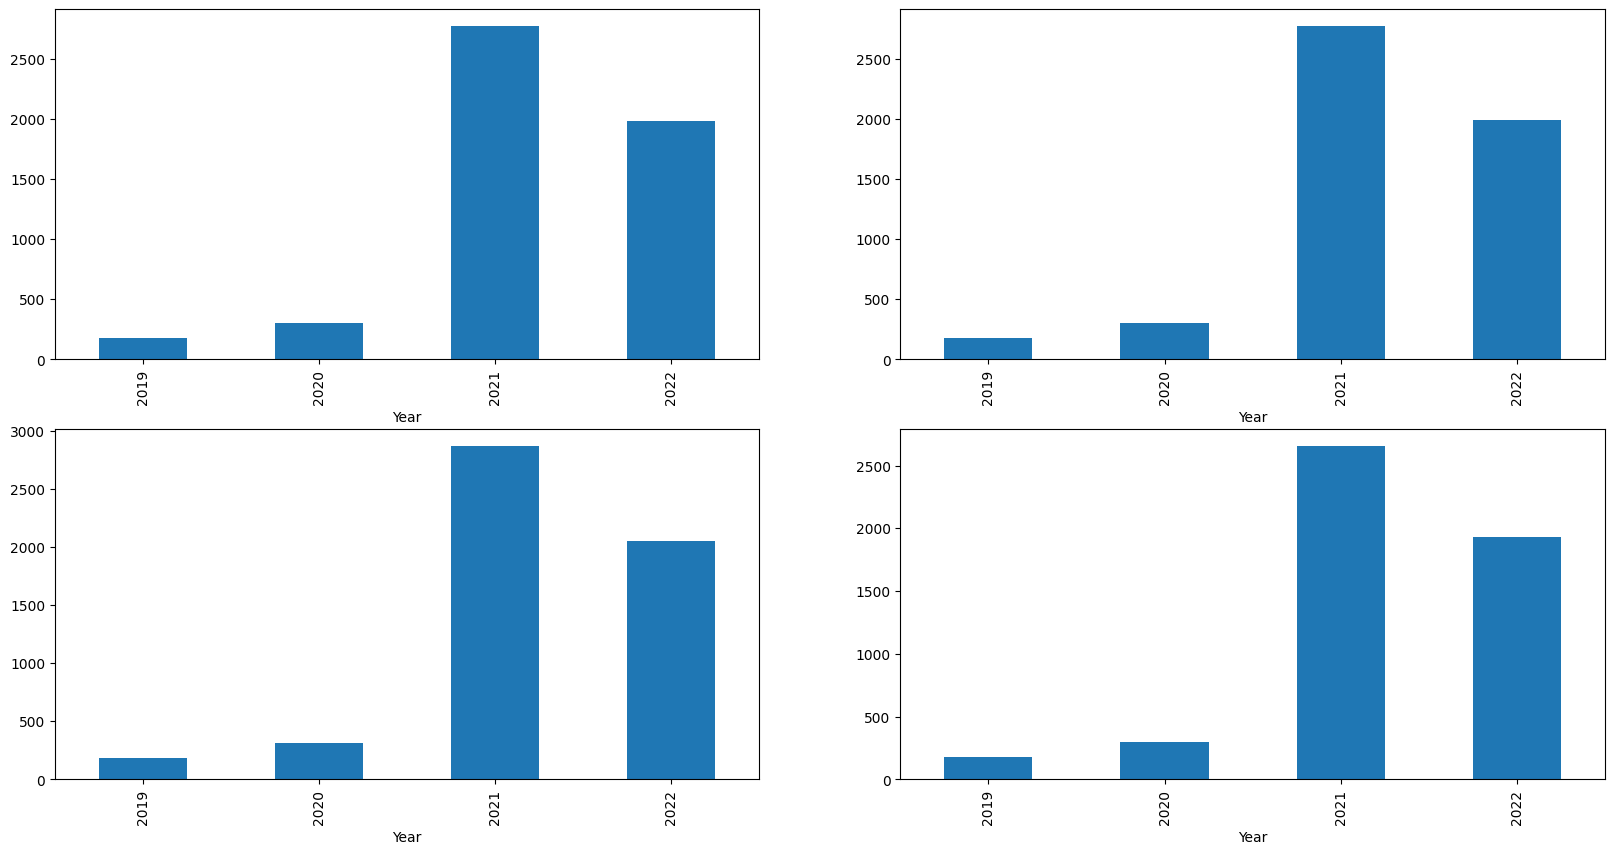

In [ ]:
data_grouped = df_etherium.groupby('Year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Price','Open', 'High', 'Low']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [ ]:
df_etherium['open-price']  = df_etherium['Open'] - df_etherium['Price']
df_etherium['low-high']  = df_etherium['Low'] - df_etherium['High']

In [ ]:
df_etherium.head()

Date    Price     Open     High      Low     Vol. Change % Month  \
0  Dec 31, 2022  1195.67  1200.00  1207.71  1193.16  150.20K   -0.34%   Dec   
1  Dec 30, 2022  1199.80  1200.84  1202.13  1186.10  285.77K   -0.09%   Dec   
2  Dec 29, 2022  1200.84  1189.99  1205.34  1187.19  272.59K    0.91%   Dec   
3  Dec 28, 2022  1189.98  1211.60  1214.32  1184.22  407.45K   -1.78%   Dec   
4  Dec 27, 2022  1211.60  1228.22  1233.15  1202.02  290.02K   -1.31%   Dec   

   Day  Year  open-price  low-high  
0   31  2022        4.33    -14.55  
1   30  2022        1.04    -16.03  
2   29  2022      -10.85    -18.15  
3   28  2022       21.62    -30.10  
4   27  2022       16.62    -31.13

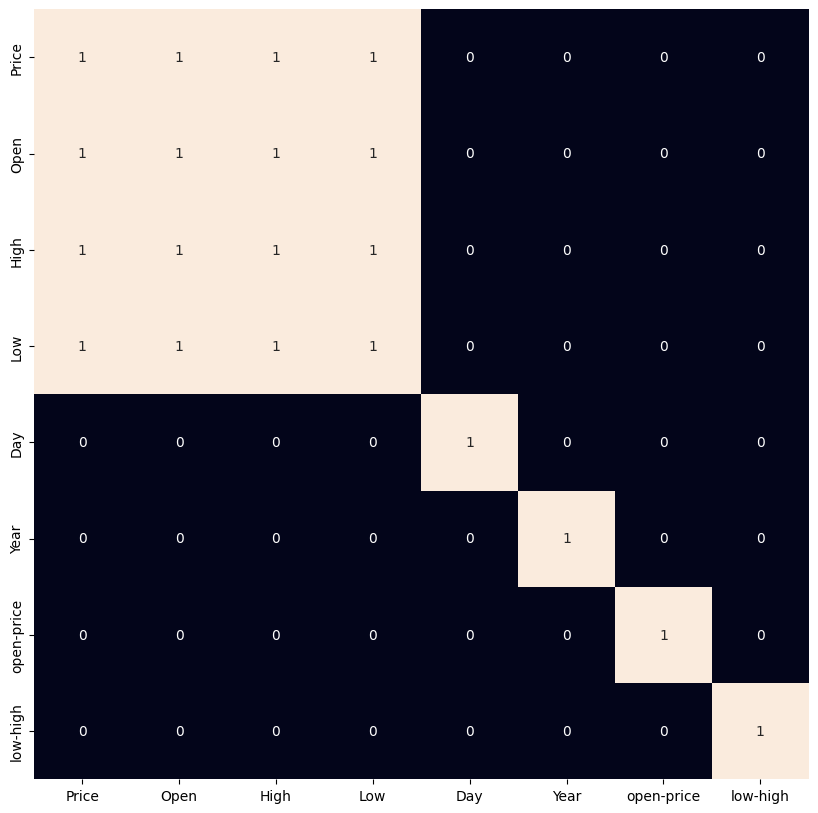

In [ ]:
plt.figure(figsize=(10, 10))

sb.heatmap(df_etherium.corr() > 0.9, annot=True, cbar=False)
plt.show()

Linear Regression for Etherium

In [ ]:
required_features = ['Open', 'High', 'Low', 'open-price', 'low-high', 'Day', 'Year']
output_label = 'Price'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_etherium[required_features], df_etherium[output_label],test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.score(x_test, y_test)

1.0

In [ ]:
future_set = df_etherium.shift(periods=30).tail(30)

In [ ]:
prediction = model.predict(future_set[required_features])

Text(0, 0.5, '$ Price')

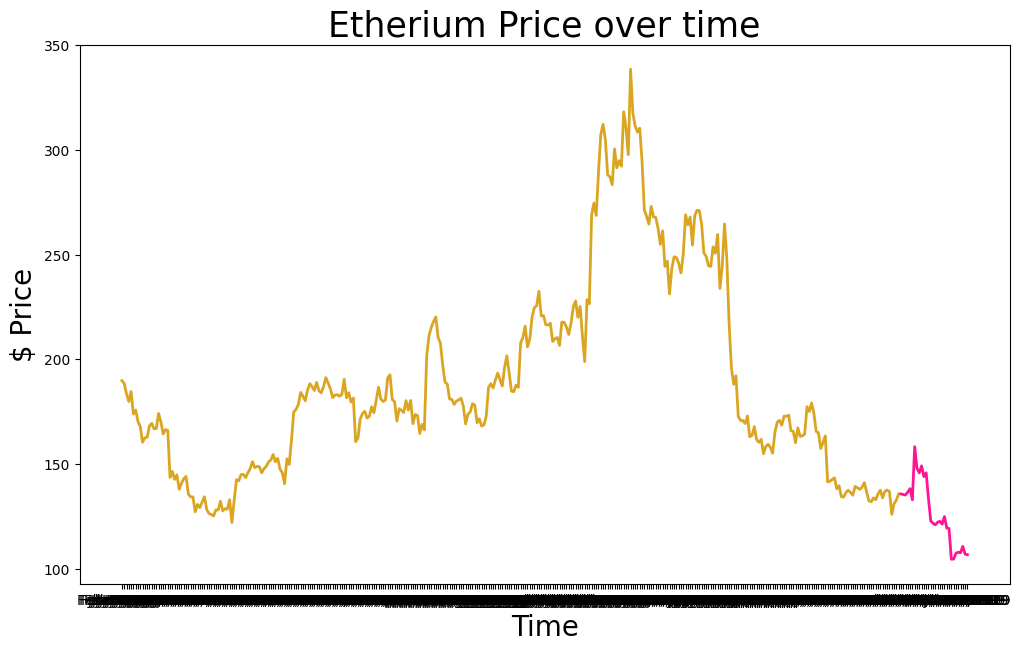

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(df_etherium["Date"][-400:-60], df_etherium["Open"][-400:-60],  color='goldenrod', lw=2)
plt.plot(future_set["Date"], prediction, color='deeppink', lw=2)
plt.title("Etherium Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Random Forest for Etherium

In [ ]:
X=df_etherium[required_features]
y=df_etherium[output_label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=False)

In [ ]:
train_error=[]
test_error=[]
minDepth=20
maxDepth=40
models=[]
for depth in range(minDepth,maxDepth,5):
    regr=RandomForestRegressor(max_depth=depth, random_state=0,n_estimators=5,verbose=2)
    regr.fit(X_train, y_train)
    models.append(regr)
    tr_error=math.sqrt(mean_squared_error(regr.predict(X_train),y_train))
    te_error=math.sqrt(mean_squared_error(regr.predict(X_test),y_test))
    test_error.append(tr_error)
    train_error.append(te_error)
    print (depth,tr_error,te_error)

building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
20 19.945402304259662 6.923642773567441
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
25 19.945402304259662 6.923642773567441
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
30 19.945402304259662 6.923642773567441
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
35 19.945402304259662 6.923642773567441


In [ ]:
y_test.head()

1168    175.14
1169    171.91
1170    172.81
1171    177.31
1172    174.53
Name: Price, dtype: float64

In [ ]:
print('testing error',mean_squared_error(regr.predict(X_test),y_test))
print('training error',mean_squared_error(regr.predict(X_train),y_train))

testing error 47.936829255972654
training error 397.8190730787667


LSTM for Etherium

In [ ]:
price = df_etherium.Price

X = price
size = int(len(X) * 0.8)
X_train, X_test = X[0:size], X[size:len(X)]
training_values = X_train.values
training_values = np.reshape(training_values, (len(training_values), 1))

scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)

x_train = training_values[0: len(training_values)-1]
y_train = training_values[1: len(training_values)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [ ]:
model = Sequential()
model.add(LSTM(10,input_shape = (None,1), activation="relu", return_sequences=True))
model.add(Dense(1))

In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
37/37 [==============================] - 2s 2ms/step - loss: 0.1526
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1137
Epoch 3/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0840
Epoch 4/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 5/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0487
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 0.0399
Epoch 7/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0347
Epoch 8/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 9/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 10/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0233
Epoch 11/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 12/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 13/50
37/37 [==============================

In [ ]:
test_values = X_test.values
test_values = np.reshape(test_values, (len(test_values), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))
predicted_price = model.predict(test_values)
predicted_price = np.reshape(predicted_price, (len(predicted_price), 1))
predicted_price = scaler.inverse_transform(predicted_price)

In [ ]:
plt.figure(figsize=(15, 6))
ax = plt.gca()
plt.plot(X_test.values, color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Price')
plt.title('Etherium Price Prediction (LSTM)')
X_test = X_test.reset_index()
x= X_test.index
labels = X_test['index']
plt.xticks(x, labels, rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('$ Price')
plt.legend(loc=4, prop={'size': 14})
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(X_test.Price.values, predicted_price))
print('Test RMSE: %.3f' % rmse)

**Price prediction for Cardano**

In [ ]:
df_cardano = pd.read_csv('/content/drive/MyDrive/VNP proekt/Cardano Historical Data.csv')
df_cardano.head()

In [ ]:
df_cardano.shape

In [ ]:
df_cardano.describe()

In [ ]:
df_cardano.info()

In [ ]:
plt.figure(figsize=(200, 20))
plt.plot(df_cardano['Price'])
plt.title('Cardano Price', fontsize=10)
plt.ylabel('Price in dollars.')
plt.show()

In [ ]:
df_cardano.isnull().sum()

In [ ]:
df_cardano['Price'] = df_cardano['Price'].astype(float)
df_cardano['Open'] = df_cardano['Open'].astype(float)
df_cardano['High'] = df_cardano['High'].astype(float)
df_cardano['Low'] = df_cardano['Low'].astype(float)

In [ ]:
features = ['Price', 'Open', 'High', 'Low']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df_cardano[col])
plt.show()

In [ ]:
splitted = df_cardano['Date'].str.split(' ', expand=True)
df_cardano['Month'] = splitted[0]

splitted = df_cardano['Date'].str.split(',', expand=True)
df_cardano['Day'] = splitted[0]
splitted = df_cardano['Day'].str.split(' ', expand=True)
df_cardano['Day'] = splitted[1].astype('int')

splitted = df_cardano['Date'].str.split(',', expand=True)
df_cardano['Year'] = splitted[1].astype('int')


df_cardano.head()

In [ ]:
data_grouped = df_cardano.groupby('Year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Price','Open', 'High', 'Low']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [ ]:
df_cardano['open-price']  = df_cardano['Open'] - df_cardano['Price']
df_cardano['low-high']  = df_cardano['Low'] - df_cardano['High']

In [ ]:
df_cardano.head()

In [ ]:
plt.figure(figsize=(10, 10))

sb.heatmap(df_cardano.corr() > 0.9, annot=True, cbar=False)
plt.show()

Linear Regression for Cardano


In [ ]:
required_features = ['Open', 'High', 'Low', 'open-price', 'low-high', 'Day', 'Year']
output_label = 'Price'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_cardano[required_features], df_cardano[output_label],test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

In [ ]:
model.score(x_test, y_test)

In [ ]:
future_set = df_cardano.shift(periods=30).tail(30)

In [ ]:
prediction = model.predict(future_set[required_features])

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(df_cardano["Date"][-400:-60], df_cardano["Open"][-400:-60],  color='goldenrod', lw=2)
plt.plot(future_set["Date"], prediction, color='deeppink', lw=2)
plt.title("Cardano Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Random Forest for Cardano

In [ ]:
X=df_cardano[required_features]
y=df_cardano[output_label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=False)

In [ ]:
train_error=[]
test_error=[]
minDepth=20
maxDepth=40
models=[]
for depth in range(minDepth,maxDepth,5):
    regr=RandomForestRegressor(max_depth=depth, random_state=0,n_estimators=5,verbose=2)
    regr.fit(X_train, y_train)
    models.append(regr)
    tr_error=math.sqrt(mean_squared_error(regr.predict(X_train),y_train))
    te_error=math.sqrt(mean_squared_error(regr.predict(X_test),y_test))
    test_error.append(tr_error)
    train_error.append(te_error)
    print (depth,tr_error,te_error)

In [ ]:
y_test.head()

In [ ]:
print('testing error',mean_squared_error(regr.predict(X_test),y_test))
print('training error',mean_squared_error(regr.predict(X_train),y_train))

LSTM for Cardano

In [ ]:
price = df_cardano.Price

X = price
size = int(len(X) * 0.8)
X_train, X_test = X[0:size], X[size:len(X)]
training_values = X_train.values
training_values = np.reshape(training_values, (len(training_values), 1))

scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)

x_train = training_values[0: len(training_values)-1]
y_train = training_values[1: len(training_values)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [ ]:
model = Sequential()
model.add(LSTM(10,input_shape = (None,1), activation="relu", return_sequences=True))
model.add(Dense(1))

In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
model.fit(x_train,y_train,epochs=50,batch_size=32)

In [ ]:
test_values = X_test.values
test_values = np.reshape(test_values, (len(test_values), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))
predicted_price = model.predict(test_values)
predicted_price = np.reshape(predicted_price, (len(predicted_price), 1))
predicted_price = scaler.inverse_transform(predicted_price)

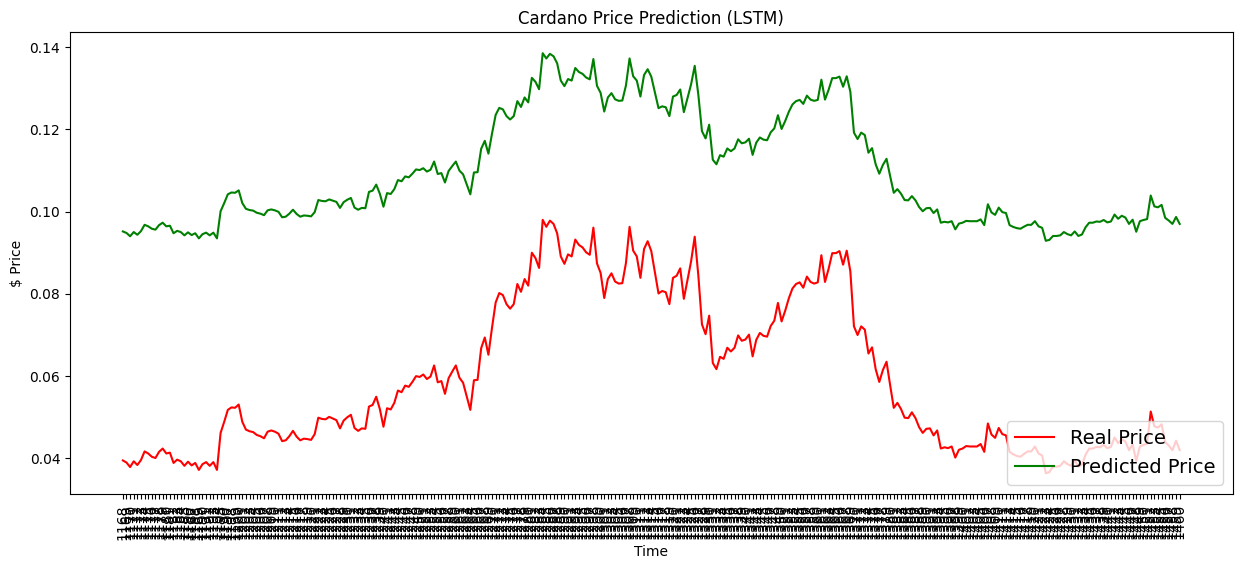

In [ ]:
plt.figure(figsize=(15, 6))
ax = plt.gca()
plt.plot(X_test.values, color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Price')
plt.title('Cardano Price Prediction (LSTM)')
X_test = X_test.reset_index()
x= X_test.index
labels = X_test['index']
plt.xticks(x, labels, rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('$ Price')
plt.legend(loc=4, prop={'size': 14})
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(X_test.Price.values, predicted_price))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.051


**Price prediction for Monero**

In [ ]:
df_monero = pd.read_csv('/content/drive/MyDrive/VNP proekt/Monero Historical Data.csv')
df_monero.head()

In [ ]:
df_monero.shape

In [ ]:
df_monero.describe()

In [405]:
df_monero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1461 non-null   object 
 1   Price     1461 non-null   float64
 2   Open      1461 non-null   float64
 3   High      1461 non-null   float64
 4   Low       1461 non-null   float64
 5   Vol.      1461 non-null   object 
 6   Change %  1461 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.0+ KB


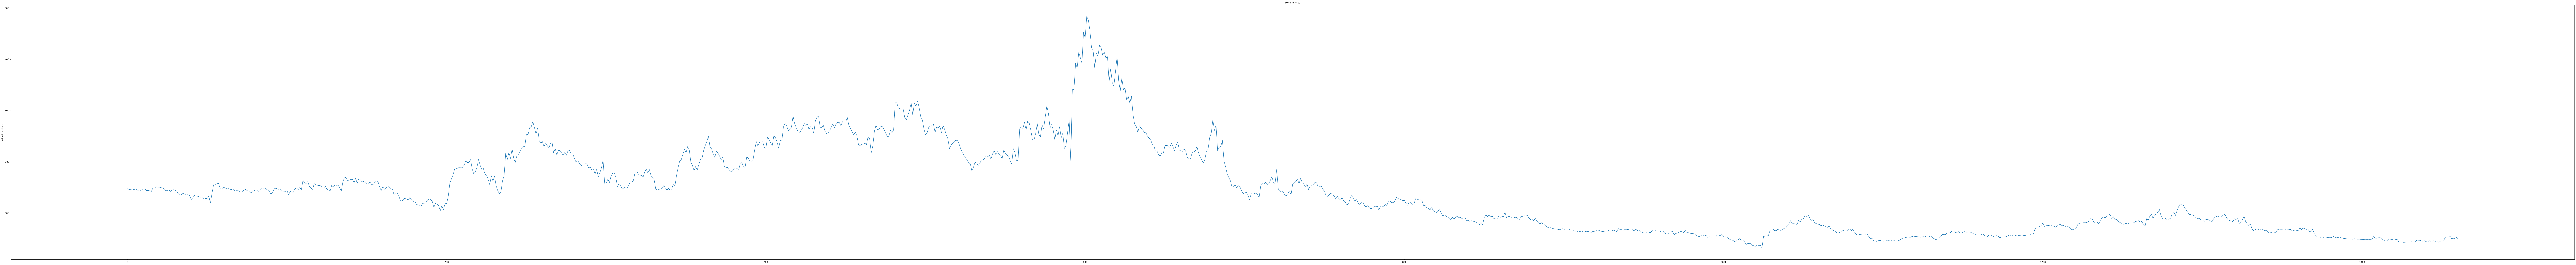

In [406]:
plt.figure(figsize=(200, 20))
plt.plot(df_monero['Price'])
plt.title('Monero Price', fontsize=10)
plt.ylabel('Price in dollars.')
plt.show()

In [407]:
df_monero.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [408]:
df_monero['Price'] = df_monero['Price'].astype(float)
df_monero['Open'] = df_monero['Open'].astype(float)
df_monero['High'] = df_monero['High'].astype(float)
df_monero['Low'] = df_monero['Low'].astype(float)

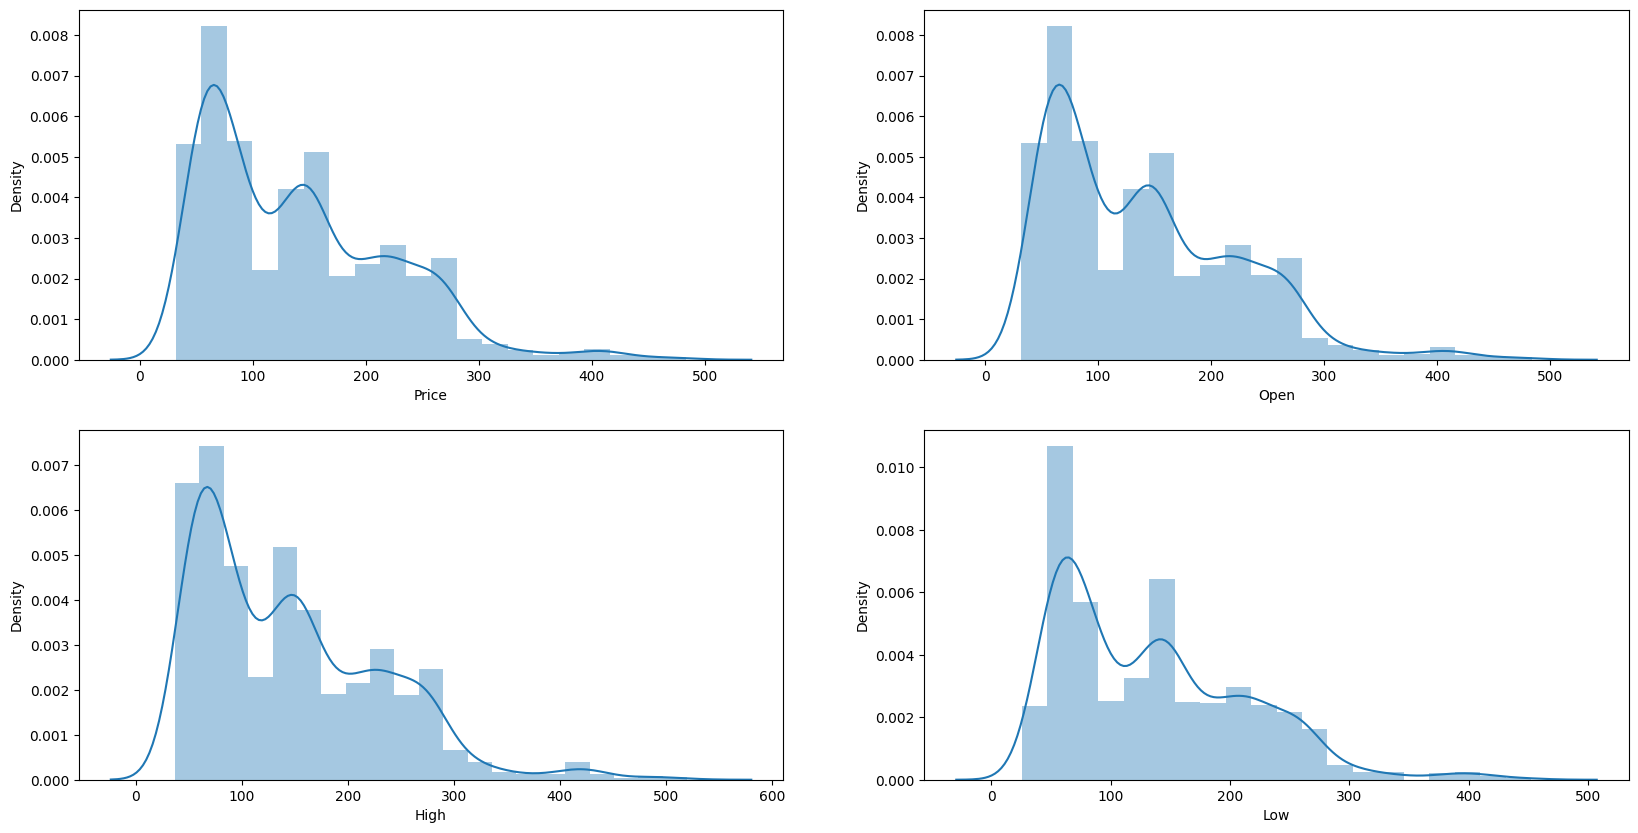

In [409]:
features = ['Price', 'Open', 'High', 'Low']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df_monero[col])
plt.show()

In [410]:
splitted = df_monero['Date'].str.split(' ', expand=True)
df_monero['Month'] = splitted[0]

splitted = df_monero['Date'].str.split(',', expand=True)
df_monero['Day'] = splitted[0]
splitted = df_monero['Day'].str.split(' ', expand=True)
df_monero['Day'] = splitted[1].astype('int')

splitted = df_monero['Date'].str.split(',', expand=True)
df_monero['Year'] = splitted[1].astype('int')


df_monero.head()

Date    Price     Open     High      Low     Vol. Change % Month  \
0  Dec 31, 2022  147.457  146.116  148.597  145.463   61.90K    0.92%   Dec   
1  Dec 30, 2022  146.116  145.643  146.905  144.230   77.03K    0.32%   Dec   
2  Dec 29, 2022  145.643  147.103  147.488  144.972   78.83K   -0.99%   Dec   
3  Dec 28, 2022  147.103  145.682  148.039  143.830   85.74K    1.04%   Dec   
4  Dec 27, 2022  145.593  146.937  149.485  144.105  102.32K   -0.91%   Dec   

   Day  Year  
0   31  2022  
1   30  2022  
2   29  2022  
3   28  2022  
4   27  2022

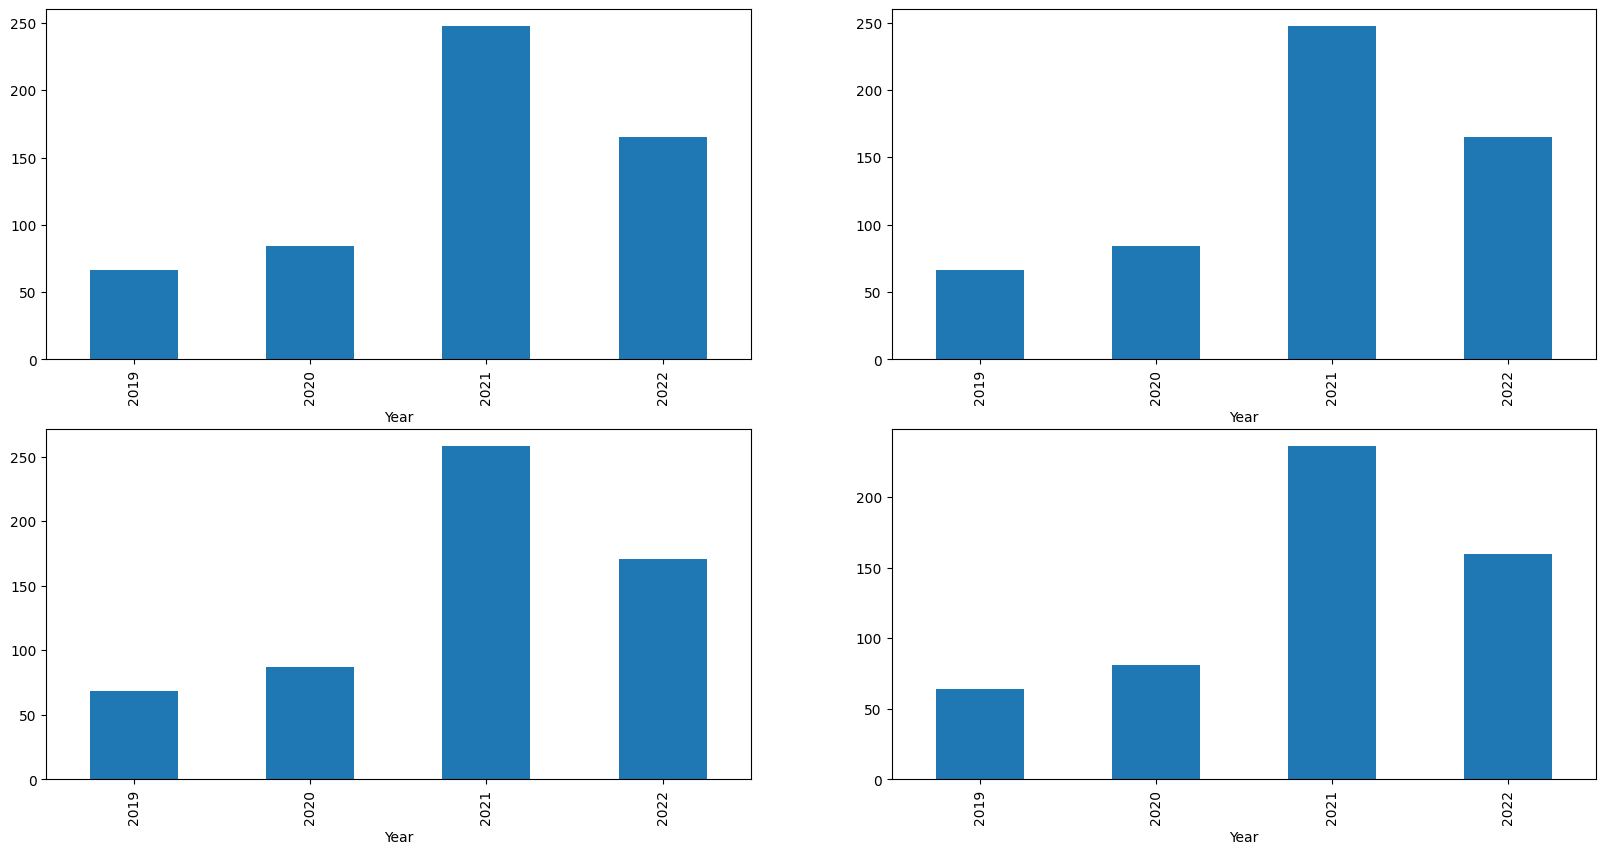

In [411]:
data_grouped = df_monero.groupby('Year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Price','Open', 'High', 'Low']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [412]:
df_monero['open-price']  = df_monero['Open'] - df_monero['Price']
df_monero['low-high']  = df_monero['Low'] - df_monero['High']

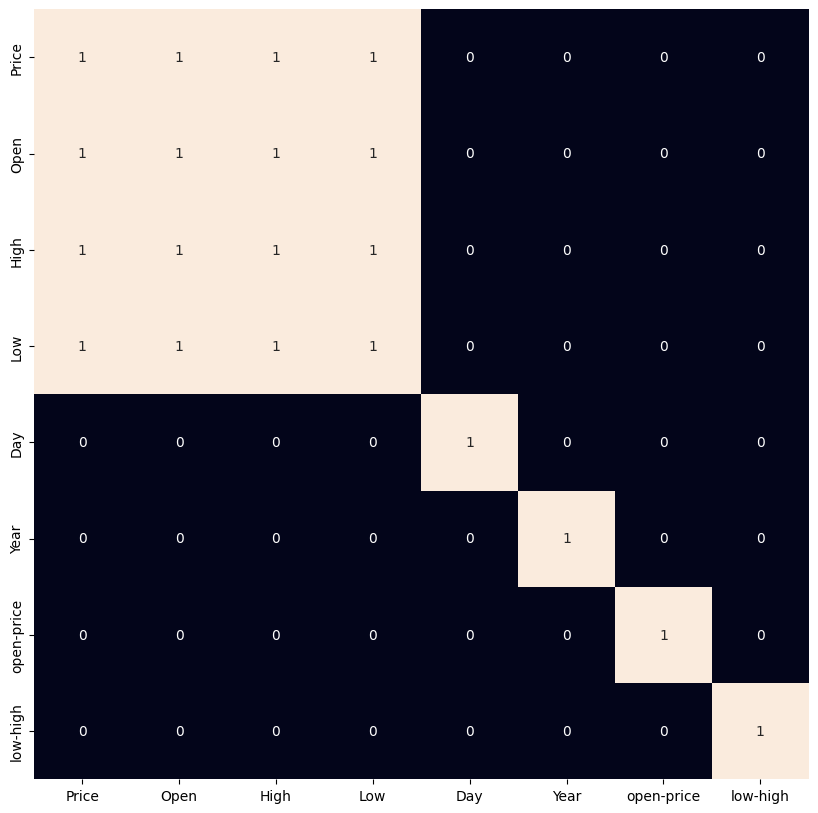

In [413]:
plt.figure(figsize=(10, 10))

sb.heatmap(df_monero.corr() > 0.9, annot=True, cbar=False)
plt.show()

Linear Regression for Monero

In [414]:
required_features = ['Open', 'High', 'Low', 'open-price', 'low-high', 'Day', 'Year']
output_label = 'Price'

In [415]:
x_train, x_test, y_train, y_test = train_test_split(df_monero[required_features], df_monero[output_label],test_size = 0.2)

In [416]:
from sklearn.linear_model import LinearRegression

In [417]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [418]:
model.score(x_test, y_test)

1.0

In [419]:
future_set = df_monero.shift(periods=30).tail(30)

In [420]:
prediction = model.predict(future_set[required_features])

Text(0, 0.5, '$ Price')

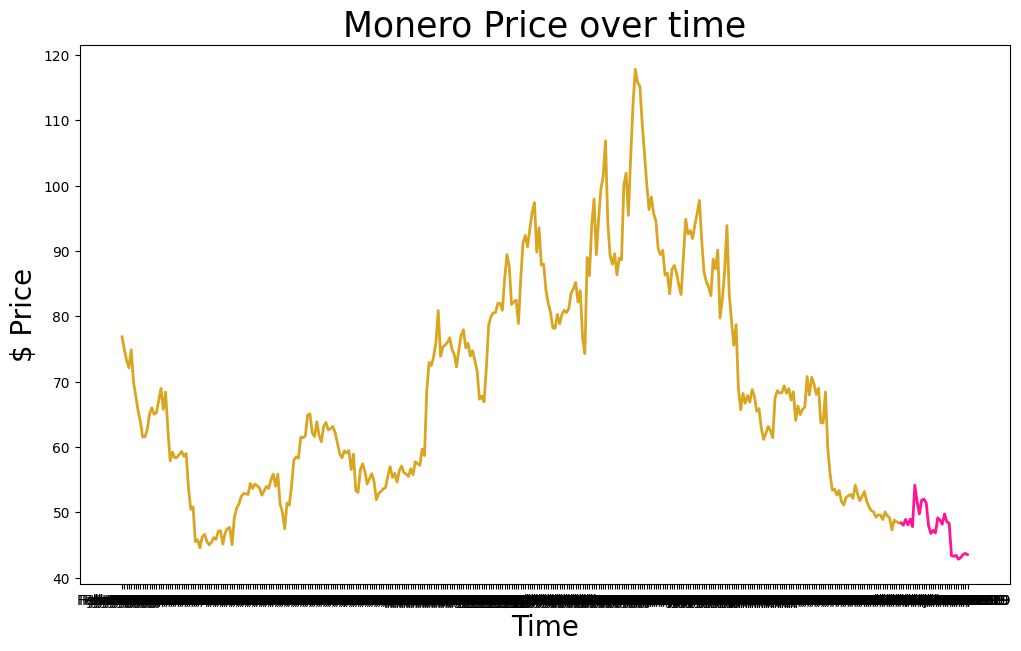

In [421]:
plt.figure(figsize = (12, 7))
plt.plot(df_monero["Date"][-400:-60], df_monero["Open"][-400:-60],  color='goldenrod', lw=2)
plt.plot(future_set["Date"], prediction, color='deeppink', lw=2)
plt.title("Monero Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Random Forest for Monero

In [422]:
X=df_monero[required_features]
y=df_monero[output_label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=False)

In [423]:
train_error=[]
test_error=[]
minDepth=20
maxDepth=40
models=[]
for depth in range(minDepth,maxDepth,5):
    regr=RandomForestRegressor(max_depth=depth, random_state=0,n_estimators=5,verbose=2)
    regr.fit(X_train, y_train)
    models.append(regr)
    tr_error=math.sqrt(mean_squared_error(regr.predict(X_train),y_train))
    te_error=math.sqrt(mean_squared_error(regr.predict(X_test),y_test))
    test_error.append(tr_error)
    train_error.append(te_error)
    print (depth,tr_error,te_error)

building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
20 2.2627079990592796 1.5465801895570677
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
25 2.2627079990592796 1.5465801895570677
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
30 2.2627079990592796 1.5465801895570677
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
35 2.2627079990592796 1.5465801895570677


In [424]:
y_test.head()

1168    56.230
1169    54.273
1170    55.137
1171    55.906
1172    54.668
Name: Price, dtype: float64

In [425]:
print('testing error',mean_squared_error(regr.predict(X_test),y_test))
print('training error',mean_squared_error(regr.predict(X_train),y_train))

testing error 2.3919102827303753
training error 5.119847489006848


LSTM for Monero

In [426]:
price = df_monero.Price

X = price
size = int(len(X) * 0.8)
X_train, X_test = X[0:size], X[size:len(X)]
training_values = X_train.values
training_values = np.reshape(training_values, (len(training_values), 1))

scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)

x_train = training_values[0: len(training_values)-1]
y_train = training_values[1: len(training_values)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [427]:
model = Sequential()
model.add(LSTM(10,input_shape = (None,1), activation="relu", return_sequences=True))
model.add(Dense(1))

In [428]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [429]:
model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
37/37 [==============================] - 1s 2ms/step - loss: 0.1030
Epoch 2/50
37/37 [==============================] - 0s 1ms/step - loss: 0.0815
Epoch 3/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 4/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0523
Epoch 5/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0422
Epoch 6/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0347
Epoch 7/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0295
Epoch 8/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 9/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0240
Epoch 10/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 11/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0214
Epoch 12/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 13/50
37/37 [==============================

In [430]:
test_values = X_test.values
test_values = np.reshape(test_values, (len(test_values), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))
predicted_price = model.predict(test_values)
predicted_price = np.reshape(predicted_price, (len(predicted_price), 1))
predicted_price = scaler.inverse_transform(predicted_price)

10/10 [==============================] - 0s 1ms/step


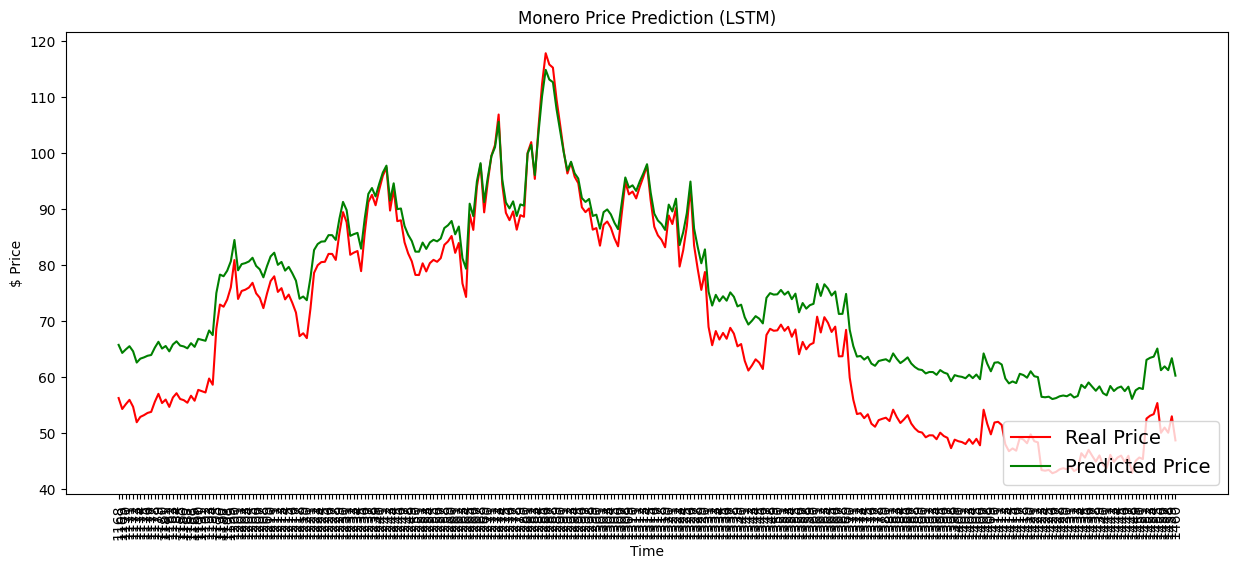

In [431]:
plt.figure(figsize=(15, 6))
ax = plt.gca()
plt.plot(X_test.values, color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Price')
plt.title('Monero Price Prediction (LSTM)')
X_test = X_test.reset_index()
x= X_test.index
labels = X_test['index']
plt.xticks(x, labels, rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('$ Price')
plt.legend(loc=4, prop={'size': 14})
plt.show()

**Price prediction for Dash**

In [432]:
df_dash = pd.read_csv('/content/drive/MyDrive/VNP proekt/Dash Historical Data.csv')
df_dash.head()

Date  Price   Open   High    Low     Vol. Change %
0  Dec 31, 2022  42.00  41.97  43.26  41.68  125.69K    0.07%
1  Dec 30, 2022  41.97  42.56  42.69  41.30  137.02K   -1.40%
2  Dec 29, 2022  42.56  42.96  43.61  41.92  101.10K   -0.89%
3  Dec 28, 2022  42.95  44.14  44.18  42.40  160.56K   -2.69%
4  Dec 27, 2022  44.13  44.97  45.52  43.38  116.68K   -1.86%

In [433]:
df_dash.shape

(1461, 7)

In [434]:
df_dash.describe()

Price         Open         High          Low
count  1461.000000  1461.000000  1461.000000  1461.000000
mean    110.050794   110.078268   114.707214   105.060575
std      64.411155    64.396798    68.564220    60.007781
min      32.200000    32.210000    34.070000    30.860000
25%      68.340000    68.450000    70.340000    66.700000
50%      91.660000    91.680000    94.090000    87.810000
75%     134.920000   134.930000   140.490000   129.520000
max     443.640000   443.470000   475.740000   392.720000

In [435]:
df_dash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1461 non-null   object 
 1   Price     1461 non-null   float64
 2   Open      1461 non-null   float64
 3   High      1461 non-null   float64
 4   Low       1461 non-null   float64
 5   Vol.      1461 non-null   object 
 6   Change %  1461 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.0+ KB


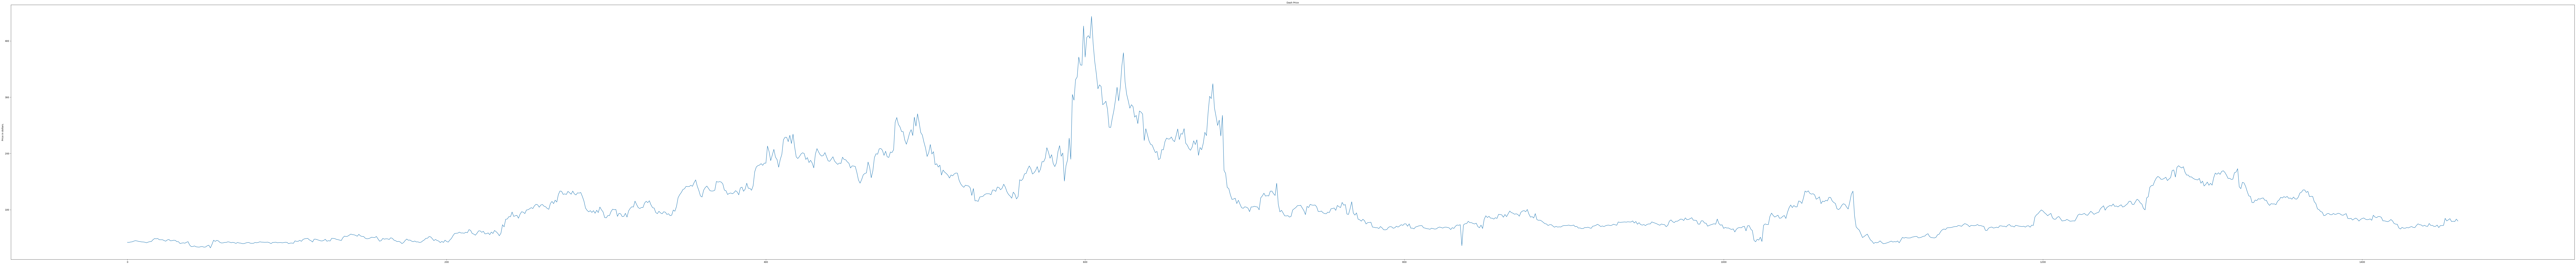

In [436]:
plt.figure(figsize=(200, 20))
plt.plot(df_dash['Price'])
plt.title('Dash Price', fontsize=10)
plt.ylabel('Price in dollars.')
plt.show()

In [437]:
df_dash.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [438]:
df_dash['Price'] = df_dash['Price'].astype(float)
df_dash['Open'] = df_dash['Open'].astype(float)
df_dash['High'] = df_dash['High'].astype(float)
df_dash['Low'] = df_dash['Low'].astype(float)

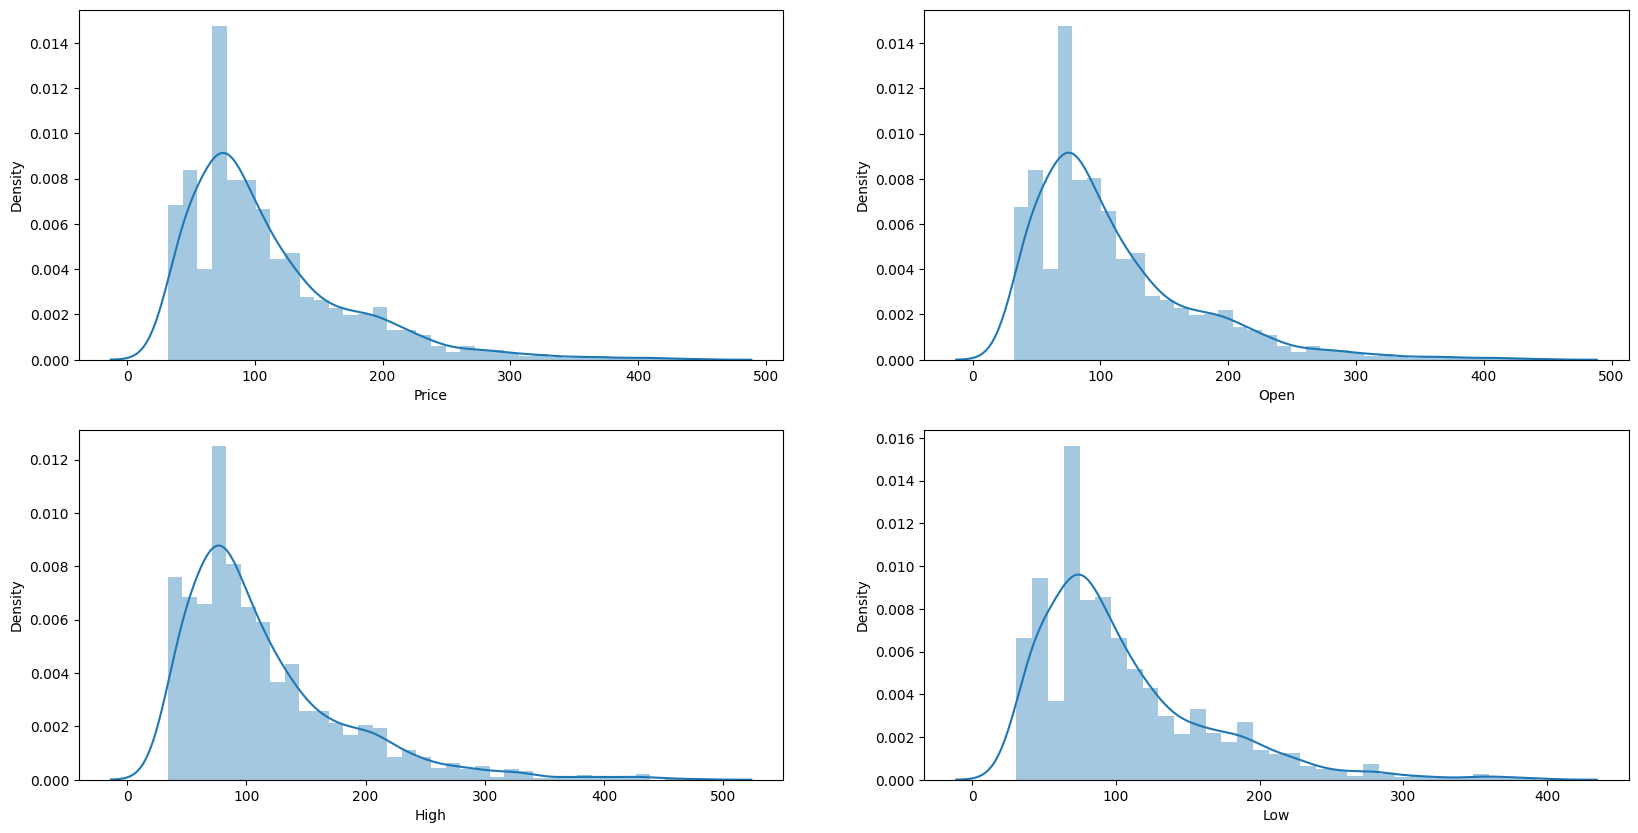

In [439]:
features = ['Price', 'Open', 'High', 'Low']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df_dash[col])
plt.show()

In [440]:
splitted = df_dash['Date'].str.split(' ', expand=True)
df_dash['Month'] = splitted[0]

splitted = df_dash['Date'].str.split(',', expand=True)
df_dash['Day'] = splitted[0]
splitted = df_dash['Day'].str.split(' ', expand=True)
df_dash['Day'] = splitted[1].astype('int')

splitted = df_dash['Date'].str.split(',', expand=True)
df_dash['Year'] = splitted[1].astype('int')


df_dash.head()

Date  Price   Open   High    Low     Vol. Change % Month  Day  Year
0  Dec 31, 2022  42.00  41.97  43.26  41.68  125.69K    0.07%   Dec   31  2022
1  Dec 30, 2022  41.97  42.56  42.69  41.30  137.02K   -1.40%   Dec   30  2022
2  Dec 29, 2022  42.56  42.96  43.61  41.92  101.10K   -0.89%   Dec   29  2022
3  Dec 28, 2022  42.95  44.14  44.18  42.40  160.56K   -2.69%   Dec   28  2022
4  Dec 27, 2022  44.13  44.97  45.52  43.38  116.68K   -1.86%   Dec   27  2022

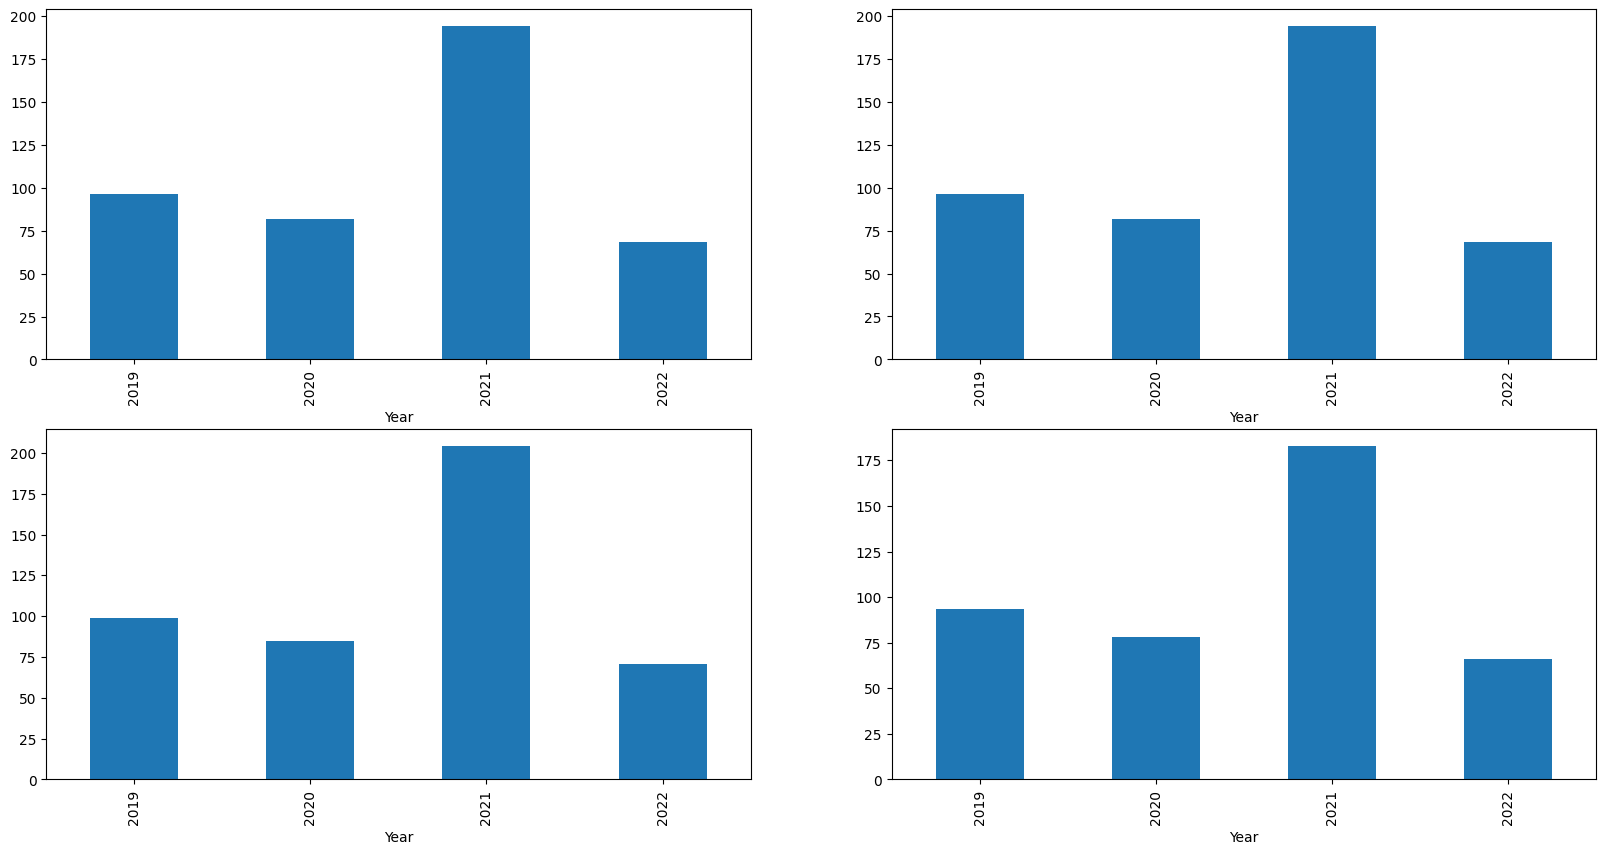

In [441]:
data_grouped = df_dash.groupby('Year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Price','Open', 'High', 'Low']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [442]:
df_dash['open-price']  = df_dash['Open'] - df_dash['Price']
df_dash['low-high']  = df_dash['Low'] - df_dash['High']

In [443]:
df_dash.head()

Date  Price   Open   High    Low     Vol. Change % Month  Day  \
0  Dec 31, 2022  42.00  41.97  43.26  41.68  125.69K    0.07%   Dec   31   
1  Dec 30, 2022  41.97  42.56  42.69  41.30  137.02K   -1.40%   Dec   30   
2  Dec 29, 2022  42.56  42.96  43.61  41.92  101.10K   -0.89%   Dec   29   
3  Dec 28, 2022  42.95  44.14  44.18  42.40  160.56K   -2.69%   Dec   28   
4  Dec 27, 2022  44.13  44.97  45.52  43.38  116.68K   -1.86%   Dec   27   

   Year  open-price  low-high  
0  2022       -0.03     -1.58  
1  2022        0.59     -1.39  
2  2022        0.40     -1.69  
3  2022        1.19     -1.78  
4  2022        0.84     -2.14

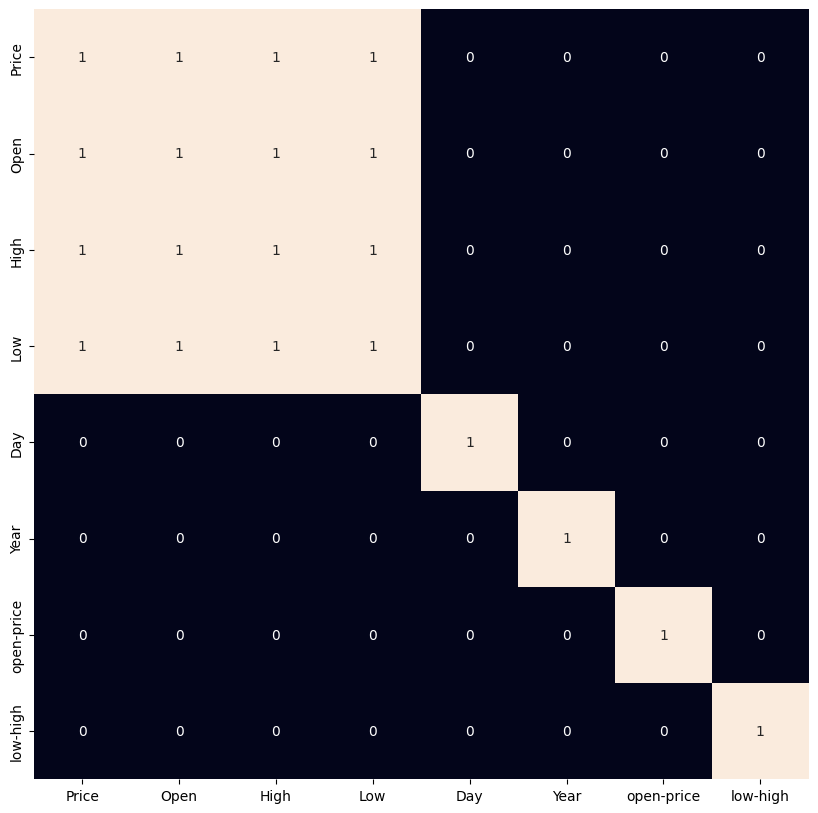

In [444]:
plt.figure(figsize=(10, 10))

sb.heatmap(df_dash.corr() > 0.9, annot=True, cbar=False)
plt.show()

Linear Regression for Dash

In [445]:
required_features = ['Open', 'High', 'Low', 'open-price', 'low-high', 'Day', 'Year']
output_label = 'Price'

In [446]:
x_train, x_test, y_train, y_test = train_test_split(df_dash[required_features], df_dash[output_label],test_size = 0.2)

In [447]:
from sklearn.linear_model import LinearRegression

In [448]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [449]:
model.score(x_test, y_test)

1.0

In [450]:
future_set = df_dash.shift(periods=30).tail(30)

In [451]:
prediction = model.predict(future_set[required_features])

Text(0, 0.5, '$ Price')

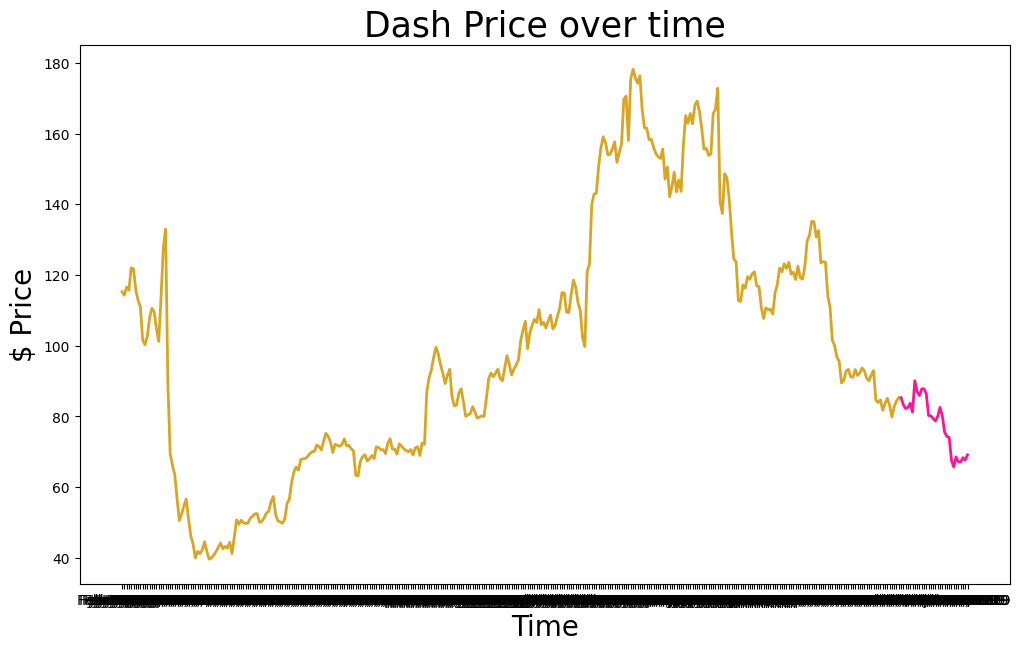

In [452]:
plt.figure(figsize = (12, 7))
plt.plot(df_dash["Date"][-400:-60], df_dash["Open"][-400:-60],  color='goldenrod', lw=2)
plt.plot(future_set["Date"], prediction, color='deeppink', lw=2)
plt.title("Dash Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Random Forest for Dash

In [453]:
X=df_dash[required_features]
y=df_dash[output_label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=False)

In [454]:
train_error=[]
test_error=[]
minDepth=20
maxDepth=40
models=[]
for depth in range(minDepth,maxDepth,5):
    regr=RandomForestRegressor(max_depth=depth, random_state=0,n_estimators=5,verbose=2)
    regr.fit(X_train, y_train)
    models.append(regr)
    tr_error=math.sqrt(mean_squared_error(regr.predict(X_train),y_train))
    te_error=math.sqrt(mean_squared_error(regr.predict(X_test),y_test))
    test_error.append(tr_error)
    train_error.append(te_error)
    print (depth,tr_error,te_error)

building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
20 2.215244028581137 2.206711484719245
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
25 2.215244028581137 2.206711484719245
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
30 2.215244028581137 2.206711484719245
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
35 2.215244028581137 2.206711484719245


In [455]:
y_test.head()

1168    69.18
1169    67.42
1170    68.01
1171    68.93
1172    68.07
Name: Price, dtype: float64

In [456]:
print('testing error',mean_squared_error(regr.predict(X_test),y_test))
print('training error',mean_squared_error(regr.predict(X_train),y_train))

testing error 4.869575576791815
training error 4.907306106164385


LSTM for Dash

In [457]:
price = df_dash.Price

X = price
size = int(len(X) * 0.8)
X_train, X_test = X[0:size], X[size:len(X)]
training_values = X_train.values
training_values = np.reshape(training_values, (len(training_values), 1))

scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)

x_train = training_values[0: len(training_values)-1]
y_train = training_values[1: len(training_values)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [458]:
model = Sequential()
model.add(LSTM(10,input_shape = (None,1), activation="relu", return_sequences=True))
model.add(Dense(1))

In [459]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [460]:
model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
37/37 [==============================] - 3s 2ms/step - loss: 0.0438
Epoch 2/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 3/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 4/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 5/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 6/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 7/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 8/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 9/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 10/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 11/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 12/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 13/50
37/37 [==============================

In [461]:
test_values = X_test.values
test_values = np.reshape(test_values, (len(test_values), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))
predicted_price = model.predict(test_values)
predicted_price = np.reshape(predicted_price, (len(predicted_price), 1))
predicted_price = scaler.inverse_transform(predicted_price)

10/10 [==============================] - 0s 2ms/step


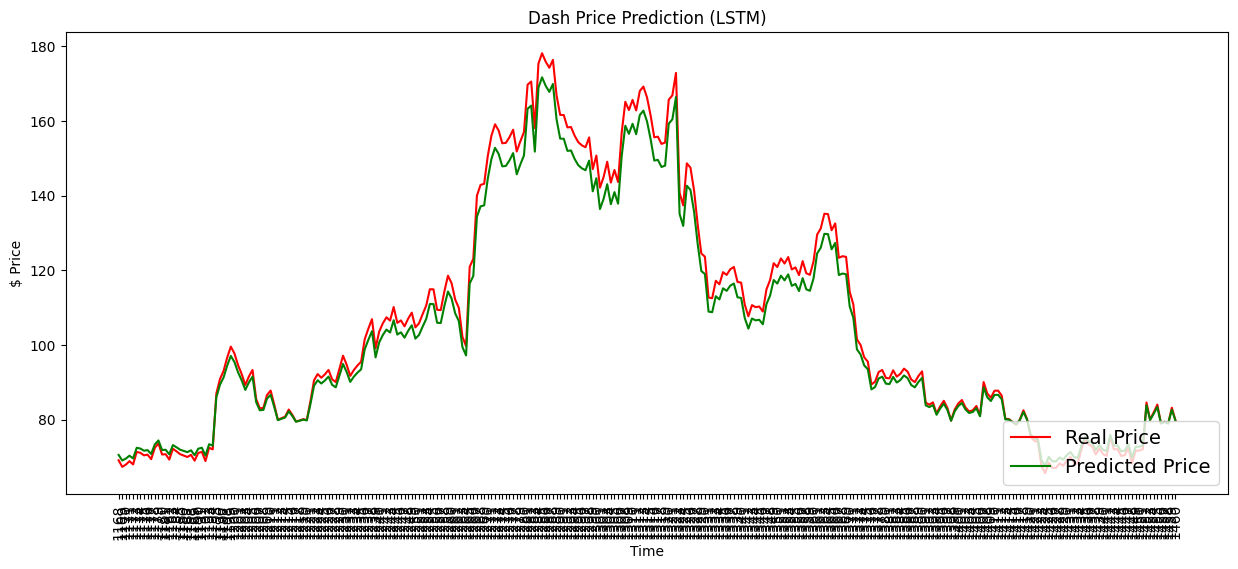

In [462]:
plt.figure(figsize=(15, 6))
ax = plt.gca()
plt.plot(X_test.values, color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Price')
plt.title('Dash Price Prediction (LSTM)')
X_test = X_test.reset_index()
x= X_test.index
labels = X_test['index']
plt.xticks(x, labels, rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('$ Price')
plt.legend(loc=4, prop={'size': 14})
plt.show()